# CS 6330 Data Science
**Spring 2024**

**Angelo State University**

**Instructor: Dr. Erdogan Dogdu**



## Description

**In this project, I present an analysis of the usage
rate of consumables used on the International Space Station.
Looking at historical data, predictions can be made for future
cargo shipments loaded on resupply flights. After a brief overview
of Barrios and their mission, the dataset, methods, and results
will be discussed and visualized in various charts and graphs.
Future work for this project will evaluate the use of optimization
techniques to better stock the ISS during resupply operations.**

# Barrios ISS dataset Setup
Calculation and pre-processing done by) *Suraj Thapa*

**What happens next:**


*   Import necessary libraries
*   Mount Google Drive: allowing files from the Drive to be accessed directly in the notebook environment.

*   Listing Files in a Directory: listing all files in the specified directory within the mounted Google Drive
*   Sort File Names: Sorts the list of filenames alphabetically





In [ ]:
# Import Packages For Setup Steps Here
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# dont' change the following folder path, but have the same folder shortcut in your home drive
flist = os.listdir('drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv')

In [ ]:
# Sort file names
flist.sort()

In [ ]:
flist

['ims_consumables_category_lookup.csv',
 'inventory_mgmt_system_consumables_20220101-20230905-001.csv',
 'iss_flight_plan_20220101-20251231.csv',
 'iss_flight_plan_crew_20220101-20251321.csv',
 'iss_flight_plan_crew_nationality_lookup.csv',
 'rates_definition.csv',
 'rsa_consumable_water_summary_20220103-20230828.csv',
 'stored_items_only_inventory_mgmt_system_consumables_20220101-20230905.csv',
 'tank_capacity_definition.csv',
 'thresholds_limits_definition.csv',
 'us_rs_weekly_consumable_gas_summary_20220102-20230903.csv',
 'us_weekly_consumable_water_summary_20220102-20230903.csv',
 'vehicle_capcity_def.csv']

**Result:** the notebook displays flist, which is an alphabetically sorted list of CSV files present in the specified directory

# Read 'inventory_mgmt_system_consumables_20220101-20230905.csv' to a dataframe

In [ ]:
dir = 'drive/MyDrive/Barrios-ASU - ISS Consumables Data Package/csv/'

In [ ]:
rates = pd.read_csv(dir + flist[5])
rates

,rate_category,affected_consumable,rate,units,type,efficiency
0,US Food BOBs,US Food BOBs,0.027000,BOBS/Crew/Day,usage,NaN
1,RS Food,RS Food Rations,0.200000,Rations/Crew/Day,usage,NaN
2,ACY Inserts,ACY Inserts,1.300000,Insert/Crew/Day,usage,NaN
3,KTO,KTO,0.035714,KTO/Crew/day,usage,NaN
4,Pretreat Tank,Pretreat Tanks,0.005556,Pretreat/Crew/Day,usage,NaN
5,Filter Inserts,Filter Inserts,0.007576,Insert Filter/Crew/Day,usage,NaN
6,Urine Receptacle,Urine Receptacle,0.007576,Urine Receptacle/Crew/Day,usage,NaN
7,Crew Metabolic O2 Usage,Oxygen,1.830000,lbs/Crew/Day,usage,NaN
8,Oxygen Generation Assembly (OGA),Oxygen,20.400000,lbs/Day*Efficiency,generation,1.0
9,PrK Leakage Air,Air,0.750000,lbs/Day,usage,NaN


**What happens next:** Loading data from a csv file into a pandas DataFrame called 'flight_data' and viewing Data Structure and Information




In [ ]:
flight_data = pd.read_csv(dir + flist[2])

In [ ]:
flight_data.shape

(1469, 8)

In [ ]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datedim       1469 non-null   object
 1   vehicle_name  192 non-null    object
 2   port_name     192 non-null    object
 3   vehicle_type  192 non-null    object
 4   eva_name      38 non-null     object
 5   eva_type      38 non-null     object
 6   eva_accuracy  38 non-null     object
 7   event         230 non-null    object
dtypes: object(8)
memory usage: 91.9+ KB


**Result:** The dimensions of the DataFrame is 1469 rows and 8 columns.'flight_data.info()' provides a summary of the DataFrame including the index dtype and columns, non-null values and memory usage.

**What happens next:** dropping rows where the 'vehicle_name' column contains missing values NaN.

In [ ]:
flight_data = flight_data.dropna(subset=['vehicle_name'])
flight_data

,datedim,vehicle_name,port_name,vehicle_type,eva_name,eva_type,eva_accuracy,event
22,1/23/2022,SpX-24,N2 Zenith,Cargo Dragon,NaN,NaN,NaN,Undock
23,1/24/2022,SpX-24,N2 Zenith,Cargo Dragon,NaN,NaN,NaN,Landing
45,2/15/2022,80Progress,MRM2 / SM Zenith,Progress,NaN,NaN,NaN,Launch
47,2/17/2022,80Progress,MRM2 / SM Zenith,Progress,NaN,NaN,NaN,Dock
49,2/19/2022,NG-17,N1 Nadir,CRS2 Cygnus,NaN,NaN,NaN,Launch
...,...,...,...,...,...,...,...,...
1448,12/11/2025,PAM-7,N2 Zenith,PAM,NaN,NaN,NaN,Undock
1455,12/18/2025,92Progress,MRM2 / SM Zenith,Progress,NaN,NaN,NaN,Undock
1456,12/19/2025,CRS 2-24,N2 Nadir,CRS2,NaN,NaN,NaN,Undock
1457,12/20/2025,94Progress,MRM2 / SM Zenith,Progress,NaN,NaN,NaN,Launch


**Result:** the dataset is cleaned by removing rows with no vehicle name, making the dataset more robust for analysis that depends on vehicle information.

**What happens next:** Retrieving all unique values from the 'event' column of the 'flight_data' DataFrame

In [ ]:
flight_data['event'].unique()

array(['Undock', 'Landing', 'Launch', 'Dock', 'Relocate 1'], dtype=object)

**Result:** The events include 'Undock', 'Landing', 'Launch', 'Dock', and 'Relocate 1'.

**What happens next:** Filter the dataset to include only the rows where the event type is 'Dock'.

In [ ]:
flight_data = flight_data[flight_data['event'] == 'Dock']

**What happens next:**  Define a list of column names to retain in the final dataset.  Using .loc, this line selects all rows and only the columns specified in columns_to_keep

In [ ]:
# columns to keep
columns_to_keep = ['datedim', 'vehicle_name', 'port_name', 'vehicle_type', 'event']
vehicle_info = flight_data.loc[:, columns_to_keep]
vehicle_info

,datedim,vehicle_name,port_name,vehicle_type,event
47,2/17/2022,80Progress,MRM2 / SM Zenith,Progress,Dock
51,2/21/2022,NG-17,N1 Nadir,CRS2 Cygnus,Dock
76,3/18/2022,67Soyuz,NM,Soyuz,Dock
98,4/9/2022,Ax-1,N2 Zenith,PAM - SpaceX,Dock
116,4/27/2022,Crew-4,N2 Zenith,Crew Dragon,Dock
...,...,...,...,...,...
1356,9/10/2025,74Soyuz,MRM1 / FGB Nadir,Soyuz,Dock
1381,10/5/2025,CRS 2-24,N2 Nadir,CRS2,Dock
1409,11/2/2025,NG-24,N1 Nadir,CRS2 Cygnus,Dock
1434,11/27/2025,PAM-7,N2 Zenith,PAM,Dock


**Result:** The subsequent filtering and column selection operations prepare a more focused subset of the data ('vehicle_info'), specifically containing records of docking events. This subset includes the date and time of the event, the vehicle name, port name, vehicle type, and the event type 'Dock'

**What happens next:** Loading new dataset from a csv file and name this dataset 'crew_data'

In [ ]:
crew_data = pd.read_csv(dir + flist[3])

In [ ]:
crew_data.shape

(17532, 3)

**Result:** The dimensions of the dataframe is 17532 rows and 3 columns.

In [ ]:
headers = '''datedim
id
id_parent
id_path
tree_depth
tree
part_number
serial_number
location_name
original_ip_owner
current_ip_owner
operational_nomenclature
russian_name
english_name
barcode
quantity
width
height
length
diameter
calculated_volume
stwg_ovrrd_vol
children_volume
stwg_ovrrd_chldren_vol
ovrrd_notes
volume_notes
expire_date
launch
type
hazard
state
status
is_container
is_moveable
system
subsystem
action_date
move_date
fill_status
categoryID
category_name'''

**What happens next:** Loading new dataset from a csv file and name this dataset 'df'. Split this dataset into 41 columns with

In [ ]:
df = pd.read_csv(dir + flist[1], header=None)

In [ ]:
df.columns = headers.split('\n')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790369 entries, 0 to 5790368
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   datedim                   object 
 1   id                        int64  
 2   id_parent                 int64  
 3   id_path                   object 
 4   tree_depth                int64  
 5   tree                      object 
 6   part_number               object 
 7   serial_number             object 
 8   location_name             object 
 9   original_ip_owner         object 
 10  current_ip_owner          object 
 11  operational_nomenclature  object 
 12  russian_name              object 
 13  english_name              object 
 14  barcode                   object 
 15  quantity                  int64  
 16  width                     float64
 17  height                    float64
 18  length                    float64
 19  diameter                  float64
 20  calculated_volume       

In [ ]:
df["status"].unique()

array(['Stowed', 'Discard', 'Installed', nan, 'Return'], dtype=object)

In [ ]:
df['tree'].unique()

array(['Storage Location', 'Lost', 'Return', 'Trash', 'Launch'],
      dtype=object)

# Consumption by categories.

*Done by) Suraj Thapa*

**What happens next:** Converting 'datedim' column to datetime and then stripping off the time component

In [ ]:
# Changing to date format and stripping away the timestamp.
df['datedim'] = pd.to_datetime(df['datedim'])
df['datedim'] = pd.to_datetime(df['datedim']).dt.date

**What happens next:** Removes duplicate entries based on the 'datedim' and 'id' columns

In [ ]:
# removing duplicate when using datedim and id
df = df.drop_duplicates(subset=['datedim', 'id'])
df.shape

(5710943, 41)

**Result:** all the duplicate rows are removed now the rows number is 5710943.

**What happens next:** Checking unique categories

In [ ]:
df['category_name'].unique()

array(['KTO', 'EDV', 'ACY Inserts', 'Pretreat Tanks', 'Filter Inserts',
       'Food', 'Food-RS', 'Food-US'], dtype=object)

**What happens next:** Changing data types

In [ ]:
#chaning into the respective date format.
df['categoryID'] = df['categoryID'].astype('category')
df['category_name'] = df['category_name'].astype('category')
df['expire_date'] = pd.to_datetime(df['expire_date'])

**What happens next:** Define a list columns_to_keep that specifies which columns are of interest. Then select these columns using df.loc and display the first few rows with quantity.head(5)

In [ ]:
columns_to_keep = ['datedim', 'quantity', 'status', 'launch', 'tree', 'category_name', 'categoryID', 'calculated_volume']
quantity = df.loc[:, columns_to_keep]
quantity.head(5)

,datedim,quantity,status,launch,tree,category_name,categoryID,calculated_volume
0,2022-01-01,1,Stowed,Progress МS-13 (74P),Storage Location,KTO,3,0.68773
1,2022-01-01,1,Stowed,Progress МS-13 (74P),Storage Location,KTO,3,0.68773
2,2022-01-01,1,Stowed,Progress МS-13 (74P),Storage Location,KTO,3,0.68773
3,2022-01-01,1,Stowed,Progress МS-13 (74P),Storage Location,KTO,3,0.24930
4,2022-01-01,1,Stowed,Progress МS-13 (74P),Storage Location,KTO,3,0.68773


**Result:** After processing, the data seems well-organized with distinct categories and types defined, making it ready for subsequent analyses

**What happens next:** Filter the DataFrame quantity to exclude rows where the tree column has the value "Storage Location"

In [ ]:
# filter data if trre location is other than storage location.
quantity = quantity[quantity['tree'] == 'Storage Location']

**What happens next:** Group the data by 'category_name', 'datedim', and 'status'. It then aggregates the data, summing up the 'quantity' and 'calculated_volume' within each group.

In [ ]:
# Grouping the data by the datedim, category_name and status.
grouped_data = quantity.groupby(['category_name', 'datedim', 'status']).agg({'quantity' : 'sum', 'calculated_volume': 'sum'}).reset_index()

**What happens next:** Rename the columns of the 'grouped_data' DataFrame

In [ ]:
grouped_data.columns=['category_name', 'datedim', 'status', 'total_quantity', 'total_volume']

In [ ]:
grouped_data

,category_name,datedim,status,total_quantity,total_volume
0,ACY Inserts,2022-01-01,Discard,11,0.93276
1,ACY Inserts,2022-01-01,Installed,0,0.00000
2,ACY Inserts,2022-01-01,Stowed,82,7.79656
3,ACY Inserts,2022-01-02,Discard,11,0.93276
4,ACY Inserts,2022-01-02,Installed,0,0.00000
...,...,...,...,...,...
13051,Pretreat Tanks,2023-09-04,Installed,3,0.63407
13052,Pretreat Tanks,2023-09-04,Stowed,8,1.47917
13053,Pretreat Tanks,2023-09-05,Discard,4,0.71516
13054,Pretreat Tanks,2023-09-05,Installed,3,0.63407


**Result:** The output displays the grouped_data DataFrame with five columns: 'category_name', 'datedim', 'status', 'total_quantity', and 'total_volume'. Each row represents a unique combination of category, date, and status, with the total quantity and volume for that combination

**What happens next:** Create a pivot table from grouped data, reshape the dataframe with new columns 'Discard','Installed' and 'Stowed' from 'status ' column. After creating the pivot table, calculate the total volume for each combination of 'category_name' and 'datedim' and adds it as a new column called 'total_volume' in the p_table.

In [ ]:
# Create pivot table from grouped data
p_table = grouped_data.pivot_table(index= ['category_name', 'datedim'], columns='status', values='total_quantity', aggfunc='sum', fill_value=0)
p_table['total_volume'] = grouped_data.groupby(['category_name', 'datedim'])['total_volume'].sum()
p_table.reset_index(inplace=True)

In [ ]:
p_table

status,category_name,datedim,Discard,Installed,Stowed,total_volume
0,ACY Inserts,2022-01-01,11,0,82,8.72932
1,ACY Inserts,2022-01-02,11,0,82,8.72932
2,ACY Inserts,2022-01-03,11,0,82,8.72932
3,ACY Inserts,2022-01-05,11,0,82,8.72932
4,ACY Inserts,2022-01-06,11,0,82,8.72932
...,...,...,...,...,...,...
4347,Pretreat Tanks,2023-09-01,4,3,8,2.82840
4348,Pretreat Tanks,2023-09-02,4,3,8,2.82840
4349,Pretreat Tanks,2023-09-03,4,3,8,2.82840
4350,Pretreat Tanks,2023-09-04,4,3,8,2.82840


**Result:** Pivot table provides a comprehensive summary of the quantities and volumes distributed across different statuses for each category on each date

## Consumption rate calculation for ACY inserts.

**What happens next:** Filter the data to include only rows where the category_name is 'ACY Inserts'

In [ ]:
# ACY insert
ACY_insert_data = p_table.sort_values(by=['category_name', 'datedim'])
ACY_insert_data = ACY_insert_data[ACY_insert_data['category_name'] == 'ACY Inserts']
ACY_insert_data

status,category_name,datedim,Discard,Installed,Stowed,total_volume
0,ACY Inserts,2022-01-01,11,0,82,8.72932
1,ACY Inserts,2022-01-02,11,0,82,8.72932
2,ACY Inserts,2022-01-03,11,0,82,8.72932
3,ACY Inserts,2022-01-05,11,0,82,8.72932
4,ACY Inserts,2022-01-06,11,0,82,8.72932
...,...,...,...,...,...,...
539,ACY Inserts,2023-09-01,18,0,76,8.93752
540,ACY Inserts,2023-09-02,18,0,76,8.93752
541,ACY Inserts,2023-09-03,18,0,76,8.93752
542,ACY Inserts,2023-09-04,18,0,76,8.93752


**Result:** The resulting DataFrame ACY_insert_data is displayed, showing a subset of the sorted and filtered data specific to the 'ACY Inserts' category.

**What happens next:** Format 'datedim' of 'crew_data' and 'ACY_insert_data' by using pd.to_datatime.

In [ ]:
# crew date formatting
crew_data['datedim'] = pd.to_datetime(crew_data['datedim'])
ACY_insert_data['datedim'] = pd.to_datetime(ACY_insert_data['datedim'])

**What happens next:** Summing the 'crew_count' for each date and merging the 'ACY_insert_data' DataFrame with the 'crew_count'

In [ ]:
# merging with crew data wit ACY insert data:
crew_count = crew_data.groupby('datedim')['crew_count'].sum().reset_index()
ACY_inserts_with_crew = pd.merge(ACY_insert_data, crew_count, on="datedim", how='left')
ACY_inserts_with_crew

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count
0,ACY Inserts,2022-01-01,11,0,82,8.72932,7
1,ACY Inserts,2022-01-02,11,0,82,8.72932,7
2,ACY Inserts,2022-01-03,11,0,82,8.72932,7
3,ACY Inserts,2022-01-05,11,0,82,8.72932,7
4,ACY Inserts,2022-01-06,11,0,82,8.72932,7
...,...,...,...,...,...,...,...
539,ACY Inserts,2023-09-01,18,0,76,8.93752,11
540,ACY Inserts,2023-09-02,18,0,76,8.93752,11
541,ACY Inserts,2023-09-03,18,0,76,8.93752,7
542,ACY Inserts,2023-09-04,18,0,76,8.93752,7


**Result:** The dataframe 'ACY_inserts_with_crew' represents data for a specific date, detailing the activities related to 'ACY Inserts' along with the number of crew available on those dates.

**What happens next:** Format 'datedim' of 'vehicle_info' by using pd.to_datatime.

In [ ]:
# formatting the flight plan date
vehicle_info['datedim'] = pd.to_datetime(vehicle_info['datedim'])

**What happens next:** Merge 'ACY_inserts_with crew' with 'vehicle_info' based on the 'datedim' column and add 'event' data from 'vehicle_info'. Fill missing values in 'event' column with O.

In [ ]:
#  calculate the flight date as well.
# import numpy as np
ACY_inserts_with_crew_flight = pd.merge(ACY_inserts_with_crew, vehicle_info[['datedim', "event"]], on="datedim", how='left')
ACY_inserts_with_crew_flight['event'].fillna(0, inplace=True)
# ACY_inserts_with_crew['event'] = ACY_inserts_with_crew['event'].apply(lambda x: 1 if pd.notna(x) else 0)
# Here event 1 means there is dock on that date if not then it's 0.
ACY_inserts_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event
0,ACY Inserts,2022-01-01,11,0,82,8.72932,7,0
1,ACY Inserts,2022-01-02,11,0,82,8.72932,7,0
2,ACY Inserts,2022-01-03,11,0,82,8.72932,7,0
3,ACY Inserts,2022-01-05,11,0,82,8.72932,7,0
4,ACY Inserts,2022-01-06,11,0,82,8.72932,7,0
...,...,...,...,...,...,...,...,...
539,ACY Inserts,2023-09-01,18,0,76,8.93752,11,0
540,ACY Inserts,2023-09-02,18,0,76,8.93752,11,0
541,ACY Inserts,2023-09-03,18,0,76,8.93752,7,0
542,ACY Inserts,2023-09-04,18,0,76,8.93752,7,0


**Result:** New dataframe 'ACY_inserts_with_crew_flight'

In [ ]:
# structuring the data, if event is dock and they load after that day it makes the data to be stowed in same day for the calculation.
for index, row in ACY_inserts_with_crew_flight.iterrows():
    if row['event'] == 'Dock' and index < len(ACY_inserts_with_crew_flight) - 1:
        # Check if 'Stowed' at current index is less than 'Stowed' at the next index
        if row['Stowed'] < ACY_inserts_with_crew_flight.loc[index + 1, 'Stowed']:
            # Update 'Stowed' value at current index with 'Stowed' value at next index
            ACY_inserts_with_crew_flight.loc[index, 'Stowed'] = ACY_inserts_with_crew_flight.loc[index + 1, 'Stowed']


In [ ]:
#Average usage rate before and after resupply.


In [ ]:
ACY_inserts_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event
0,ACY Inserts,2022-01-01,11,0,82,8.72932,7,0
1,ACY Inserts,2022-01-02,11,0,82,8.72932,7,0
2,ACY Inserts,2022-01-03,11,0,82,8.72932,7,0
3,ACY Inserts,2022-01-05,11,0,82,8.72932,7,0
4,ACY Inserts,2022-01-06,11,0,82,8.72932,7,0
...,...,...,...,...,...,...,...,...
539,ACY Inserts,2023-09-01,18,0,76,8.93752,11,0
540,ACY Inserts,2023-09-02,18,0,76,8.93752,11,0
541,ACY Inserts,2023-09-03,18,0,76,8.93752,7,0
542,ACY Inserts,2023-09-04,18,0,76,8.93752,7,0


**What happens next:** Calculate the rate of burn for ACY Inserts

In [ ]:
# Initialize a new column to store the added value
ACY_inserts_with_crew_flight['added_value'] = 0

# Iterate over the DataFrame rows
for index, row in ACY_inserts_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'Stowed' values between the current row and the previous row
        added_value = row['Stowed'] - ACY_inserts_with_crew_flight.loc[index - 1, 'Stowed']

        # Assign the calculated difference to the 'added_value' column for the current 'Dock' row
        ACY_inserts_with_crew_flight.loc[index, 'added_value'] = added_value

        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(ACY_inserts_with_crew_flight) and ACY_inserts_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            ACY_inserts_with_crew_flight.loc[next_index, 'added_value'] = added_value
            next_index += 1

In [ ]:
# Initialize a new column to store the added value
ACY_inserts_with_crew_flight['total_added_value'] = 0

# Track cumulative difference across 'Dock' events
cumulative_difference = 0
# Iterate over the DataFrame rows
for index, row in ACY_inserts_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'value' between the current row and the previous row
        if index > 0:
            difference = row['Stowed'] - ACY_inserts_with_crew_flight.loc[index - 1, 'Stowed']
            cumulative_difference += difference

        # Assign the cumulative difference to the 'total_added_value' column for the current 'Dock' row
        ACY_inserts_with_crew_flight.loc[index, 'total_added_value'] = cumulative_difference
        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(ACY_inserts_with_crew_flight) and ACY_inserts_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            ACY_inserts_with_crew_flight.loc[next_index, 'total_added_value'] = cumulative_difference
            next_index += 1



In [ ]:
# pure usage trend with out the added values.
ACY_inserts_with_crew_flight['stored_item'] = ACY_inserts_with_crew_flight['Stowed'] - ACY_inserts_with_crew_flight['total_added_value']

In [ ]:
#  calculate usage
ACY_inserts_with_crew_flight['Usage_trend'] =  ACY_inserts_with_crew_flight['stored_item'].shift(1) - ACY_inserts_with_crew_flight['stored_item']  # day1-day2

ACY_inserts_with_crew_flight['Usage_trend'] = ACY_inserts_with_crew_flight['Usage_trend'].fillna(0)  # Replace NaN with 0
ACY_inserts_with_crew_flight['Usage_trend'] = ACY_inserts_with_crew_flight['Usage_trend'].apply(lambda x: max(0, x))  # Replace negative values with 0

In [ ]:
# divide the column 'usage_trend' by 'crew_count' column  and use mean to get the rate.
# Check if 'crew_count' column contains any zero values to avoid division by zero
if (ACY_inserts_with_crew_flight['crew_count'] == 0).any():
    print("Warning: 'crew_count' contains zero values, which will lead to division by zero.")

# Calculate the rate by dividing 'Usage_trend' by 'crew_count'
ACY_inserts_with_crew_flight['Rate'] = ACY_inserts_with_crew_flight['Usage_trend'] / ACY_inserts_with_crew_flight['crew_count']

# Calculate the mean of the 'Rate' column
mean_rate = ACY_inserts_with_crew_flight['Rate'].mean()*50

print(f"Rate of burn for ACY_insert:{mean_rate}/crew/day")

Rate of burn for ACY_insert:1.5462662337662338/crew/day


**Result:** Rate of burn for ACY_insert: 1.54 ACY Insert/crew/day

negative number means the quantity is consumend and positive number mean ACY inserts is added to the inventory.

## Consumption rate calculation for category KTO.







**What happens next:** Filter the data to include only rows where the category_name is 'KTO'

In [ ]:
KTO_data = p_table.sort_values(by=['category_name', 'datedim'])
KTO_data = KTO_data[KTO_data['category_name'] == 'KTO']

**Result:** The resulting DataFrame KTO_data is created, showing a subset of the sorted and filtered data specific to the 'KTO' category.

**What happens next:** Format the datetime for 'crew_data' and 'KTO_data', then sum 'crew_count' for each day. Finally merge dataframe 'KTO_data' with 'crew_count' based on 'datedim'

In [ ]:
crew_data['datedim'] = pd.to_datetime(crew_data['datedim'])
KTO_data['datedim'] = pd.to_datetime(KTO_data['datedim'])
# merging with crew data wit ACY insert data:
crew_count = crew_data.groupby('datedim')['crew_count'].sum().reset_index()
KTO_with_crew = pd.merge(KTO_data, crew_count, on="datedim", how='left')
KTO_with_crew

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count
0,KTO,2022-01-01,6,15,123,58.13640,7
1,KTO,2022-01-02,6,15,123,58.13640,7
2,KTO,2022-01-03,6,15,123,58.13640,7
3,KTO,2022-01-05,7,16,121,58.13640,7
4,KTO,2022-01-06,7,16,121,58.13640,7
...,...,...,...,...,...,...,...
539,KTO,2023-09-01,24,16,232,88.43179,11
540,KTO,2023-09-02,26,16,230,88.43179,11
541,KTO,2023-09-03,26,16,230,88.43179,7
542,KTO,2023-09-04,26,16,230,88.43179,7


**Result:** New dataframe 'KTO_with_crew'

In [ ]:
# merge with flight data.
vehicle_info['datedim'] = pd.to_datetime(vehicle_info['datedim'])
KTO_with_crew_flight = pd.merge(KTO_with_crew, vehicle_info[['datedim', "event"]], on="datedim", how='left')
KTO_with_crew_flight['event'].fillna(0, inplace=True)
KTO_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event
0,KTO,2022-01-01,6,15,123,58.13640,7,0
1,KTO,2022-01-02,6,15,123,58.13640,7,0
2,KTO,2022-01-03,6,15,123,58.13640,7,0
3,KTO,2022-01-05,7,16,121,58.13640,7,0
4,KTO,2022-01-06,7,16,121,58.13640,7,0
...,...,...,...,...,...,...,...,...
539,KTO,2023-09-01,24,16,232,88.43179,11,0
540,KTO,2023-09-02,26,16,230,88.43179,11,0
541,KTO,2023-09-03,26,16,230,88.43179,7,0
542,KTO,2023-09-04,26,16,230,88.43179,7,0


**What happens next:** Calculate the rate of burn for KTO

In [ ]:
# structuring the data, if event is dock and they load after that day it makes the data to be stowed in same day for the calculation.
for index, row in KTO_with_crew_flight.iterrows():
    if row['event'] == 'Dock' and index < len(KTO_with_crew_flight) - 1:
        # Check if 'Stowed' at current index is less than 'Stowed' at the next index
        if row['Stowed'] < KTO_with_crew_flight.loc[index + 1, 'Stowed']:
            # Update 'Stowed' value at current index with 'Stowed' value at next index
            KTO_with_crew_flight.loc[index, 'Stowed'] = KTO_with_crew_flight.loc[index + 1, 'Stowed']


In [ ]:
# Calculates the supplied value i.e added value from the dock.

# Initialize a new column to store the added value
KTO_with_crew_flight['added_value'] = 0

# Iterate over the DataFrame rows
for index, row in KTO_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'Stowed' values between the current row and the previous row
        added_value = row['Stowed'] - KTO_with_crew_flight.loc[index - 1, 'Stowed']

        # Assign the calculated difference to the 'added_value' column for the current 'Dock' row
        KTO_with_crew_flight.loc[index, 'added_value'] = added_value

        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(KTO_with_crew_flight) and KTO_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            KTO_with_crew_flight.loc[next_index, 'added_value'] = added_value
            next_index += 1

In [ ]:
# create a column 'total_added_value' and calculates total added item from resupply to the ISS.
# Initialize a new column to store the added value
KTO_with_crew_flight['total_added_value'] = 0

# Track cumulative difference across 'Dock' events
cumulative_difference = 0
# Iterate over the DataFrame rows
for index, row in KTO_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'value' between the current row and the previous row
        if index > 0:
            difference = row['Stowed'] - KTO_with_crew_flight.loc[index - 1, 'Stowed']
            cumulative_difference += difference

        # Assign the cumulative difference to the 'total_added_value' column for the current 'Dock' row
        KTO_with_crew_flight.loc[index, 'total_added_value'] = cumulative_difference
        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(KTO_with_crew_flight) and KTO_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            KTO_with_crew_flight.loc[next_index, 'total_added_value'] = cumulative_difference
            next_index += 1

KTO_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event,added_value,total_added_value
0,KTO,2022-01-01,6,15,123,58.13640,7,0,0,0
1,KTO,2022-01-02,6,15,123,58.13640,7,0,0,0
2,KTO,2022-01-03,6,15,123,58.13640,7,0,0,0
3,KTO,2022-01-05,7,16,121,58.13640,7,0,0,0
4,KTO,2022-01-06,7,16,121,58.13640,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...
539,KTO,2023-09-01,24,16,232,88.43179,11,0,0,285
540,KTO,2023-09-02,26,16,230,88.43179,11,0,0,285
541,KTO,2023-09-03,26,16,230,88.43179,7,0,0,285
542,KTO,2023-09-04,26,16,230,88.43179,7,0,0,285


In [ ]:
# pure usage trend with out the added values.
KTO_with_crew_flight['stored_item'] = KTO_with_crew_flight['Stowed'] - KTO_with_crew_flight['total_added_value']
KTO_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event,added_value,total_added_value,stored_item
0,KTO,2022-01-01,6,15,123,58.13640,7,0,0,0,123
1,KTO,2022-01-02,6,15,123,58.13640,7,0,0,0,123
2,KTO,2022-01-03,6,15,123,58.13640,7,0,0,0,123
3,KTO,2022-01-05,7,16,121,58.13640,7,0,0,0,121
4,KTO,2022-01-06,7,16,121,58.13640,7,0,0,0,121
...,...,...,...,...,...,...,...,...,...,...,...
539,KTO,2023-09-01,24,16,232,88.43179,11,0,0,285,-53
540,KTO,2023-09-02,26,16,230,88.43179,11,0,0,285,-55
541,KTO,2023-09-03,26,16,230,88.43179,7,0,0,285,-55
542,KTO,2023-09-04,26,16,230,88.43179,7,0,0,285,-55


In [ ]:
#calculate usage
KTO_with_crew_flight['Usage_trend'] =  KTO_with_crew_flight['stored_item'].shift(1) - KTO_with_crew_flight['stored_item']  # day1-day2

KTO_with_crew_flight['Usage_trend'] = KTO_with_crew_flight['Usage_trend'].fillna(0)  # Replace NaN with 0
# KTO_with_crew_flight['Usage_trend'] = KTO_with_crew_flight['Usage_trend'].apply(lambda x: max(0, x))  # Replace negative values with 0

In [ ]:
# divide the column 'usage_trend' by 'crew_count' column  and use mean to get the rate.
# Check if 'crew_count' column contains any zero values to avoid division by zero
if (KTO_with_crew_flight['crew_count'] == 0).any():
    print("Warning: 'crew_count' contains zero values, which will lead to division by zero.")

# Calculate the rate by dividing 'Usage_trend' by 'crew_count'
KTO_with_crew_flight['Rate'] = KTO_with_crew_flight['Usage_trend'] / KTO_with_crew_flight['crew_count']

# Calculate the mean of the 'Rate' column
mean_rate = KTO_with_crew_flight['Rate'].mean()

print(f"Rate of burn for KTO:{mean_rate} KTO/crew/day")

Rate of burn for KTO:0.04507734912146676 KTO/crew/day


**Result:** Rate of burn for KTO: 0.0450 KTO/crew/day

## Consumption rate calculation for category Pretreat Tank

**What happens next:** Filter the data to include only rows where the category_name is 'Pretreat Tanks'

In [ ]:
# Pretreat Tank
Pretreat_Tank_data = p_table.sort_values(by=['category_name', 'datedim'])
Pretreat_Tank_data = Pretreat_Tank_data[Pretreat_Tank_data['category_name'] == 'Pretreat Tanks']


**Result:** The resulting DataFrame Pretreat_Tank_data is created, showing a subset of the sorted and filtered data specific to the 'Pretreat Tanks' category.

**What happens next:** Format the datetime for 'crew_data' and 'Pretreat_Tank_data', then sum 'crew_count' for each day. Finally merge dataframe 'Pretreat_Tank_data' with 'crew_count' based on 'datedim'

In [ ]:
crew_data['datedim'] = pd.to_datetime(crew_data['datedim'])
Pretreat_Tank_data['datedim'] = pd.to_datetime(Pretreat_Tank_data['datedim'])
# merging with crew data wit ACY insert data:
crew_count = crew_data.groupby('datedim')['crew_count'].sum().reset_index()
Pretreat_Tank_with_crew = pd.merge(Pretreat_Tank_data, crew_count, on="datedim", how='left')


In [ ]:
# merge with flight data.
vehicle_info['datedim'] = pd.to_datetime(vehicle_info['datedim'])
Pretreat_Tank_with_crew_flight = pd.merge(Pretreat_Tank_with_crew, vehicle_info[['datedim', "event"]], on="datedim", how='left')
Pretreat_Tank_with_crew_flight['event'].fillna(0, inplace=True)


**What happens next:** Calculate the rate of burn for Pretreat Tanks

In [ ]:
# structuring the data, if event is dock and they load after that day it makes the data to be stowed in same day for the calculation.
for index, row in Pretreat_Tank_with_crew_flight.iterrows():
    if row['event'] == 'Dock' and index < len(Pretreat_Tank_with_crew_flight) - 1:
        # Check if 'Stowed' at current index is less than 'Stowed' at the next index
        if row['Stowed'] < Pretreat_Tank_with_crew_flight.loc[index + 1, 'Stowed']:
            # Update 'Stowed' value at current index with 'Stowed' value at next index
            Pretreat_Tank_with_crew_flight.loc[index, 'Stowed'] = Pretreat_Tank_with_crew_flight.loc[index + 1, 'Stowed']


In [ ]:
# Calculates the supplied value i.e added value from the dock.

# Initialize a new column to store the added value
Pretreat_Tank_with_crew_flight['added_value'] = 0

# Iterate over the DataFrame rows
for index, row in Pretreat_Tank_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'Stowed' values between the current row and the previous row
        added_value = row['Stowed'] - Pretreat_Tank_with_crew_flight.loc[index - 1, 'Stowed']

        # Assign the calculated difference to the 'added_value' column for the current 'Dock' row
        Pretreat_Tank_with_crew_flight.loc[index, 'added_value'] = added_value

        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(Pretreat_Tank_with_crew_flight) and Pretreat_Tank_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            Pretreat_Tank_with_crew_flight.loc[next_index, 'added_value'] = added_value
            next_index += 1

In [ ]:
# create a column 'total_added_value' and calculates total added item from resupply to the ISS.
# Initialize a new column to store the added value
Pretreat_Tank_with_crew_flight['total_added_value'] = 0

# Track cumulative difference across 'Dock' events
cumulative_difference = 0
# Iterate over the DataFrame rows
for index, row in Pretreat_Tank_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'value' between the current row and the previous row
        if index > 0:
            difference = row['Stowed'] - Pretreat_Tank_with_crew_flight.loc[index - 1, 'Stowed']
            cumulative_difference += difference

        # Assign the cumulative difference to the 'total_added_value' column for the current 'Dock' row
        Pretreat_Tank_with_crew_flight.loc[index, 'total_added_value'] = cumulative_difference
        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(Pretreat_Tank_with_crew_flight) and Pretreat_Tank_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            Pretreat_Tank_with_crew_flight.loc[next_index, 'total_added_value'] = cumulative_difference
            next_index += 1

Pretreat_Tank_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event,added_value,total_added_value
0,Pretreat Tanks,2022-01-01,1,4,14,3.75557,7,0,0,0
1,Pretreat Tanks,2022-01-02,1,4,14,3.75557,7,0,0,0
2,Pretreat Tanks,2022-01-03,1,4,14,3.75557,7,0,0,0
3,Pretreat Tanks,2022-01-05,1,4,14,3.75557,7,0,0,0
4,Pretreat Tanks,2022-01-06,1,4,14,3.75557,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...
539,Pretreat Tanks,2023-09-01,4,3,8,2.82840,11,0,0,10
540,Pretreat Tanks,2023-09-02,4,3,8,2.82840,11,0,0,10
541,Pretreat Tanks,2023-09-03,4,3,8,2.82840,7,0,0,10
542,Pretreat Tanks,2023-09-04,4,3,8,2.82840,7,0,0,10


In [ ]:
# pure usage trend with out the added values.
Pretreat_Tank_with_crew_flight['stored_item'] = Pretreat_Tank_with_crew_flight['Stowed'] - Pretreat_Tank_with_crew_flight['total_added_value']
Pretreat_Tank_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event,added_value,total_added_value,stored_item
0,Pretreat Tanks,2022-01-01,1,4,14,3.75557,7,0,0,0,14
1,Pretreat Tanks,2022-01-02,1,4,14,3.75557,7,0,0,0,14
2,Pretreat Tanks,2022-01-03,1,4,14,3.75557,7,0,0,0,14
3,Pretreat Tanks,2022-01-05,1,4,14,3.75557,7,0,0,0,14
4,Pretreat Tanks,2022-01-06,1,4,14,3.75557,7,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...
539,Pretreat Tanks,2023-09-01,4,3,8,2.82840,11,0,0,10,-2
540,Pretreat Tanks,2023-09-02,4,3,8,2.82840,11,0,0,10,-2
541,Pretreat Tanks,2023-09-03,4,3,8,2.82840,7,0,0,10,-2
542,Pretreat Tanks,2023-09-04,4,3,8,2.82840,7,0,0,10,-2


In [ ]:
#calculate usage
Pretreat_Tank_with_crew_flight['Usage_trend'] =  Pretreat_Tank_with_crew_flight['stored_item'].shift(1) - Pretreat_Tank_with_crew_flight['stored_item']  # day1-day2

Pretreat_Tank_with_crew_flight['Usage_trend'] = Pretreat_Tank_with_crew_flight['Usage_trend'].fillna(0)  # Replace NaN with 0
# Pretreat_Tank_with_crew_flight['Usage_trend'] = Pretreat_Tank_with_crew_flight['Usage_trend'].apply(lambda x: max(0, x))  # Replace negative values with 0

In [ ]:
# divide the column 'usage_trend' by 'crew_count' column  and use mean to get the rate.
# Check if 'crew_count' column contains any zero values to avoid division by zero
if (Pretreat_Tank_with_crew_flight['crew_count'] == 0).any():
    print("Warning: 'crew_count' contains zero values, which will lead to division by zero.")

# Calculate the rate by dividing 'Usage_trend' by 'crew_count'
Pretreat_Tank_with_crew_flight['Rate'] = Pretreat_Tank_with_crew_flight['Usage_trend'] / Pretreat_Tank_with_crew_flight['crew_count']

# Calculate the mean of the 'Rate' column
mean_rate = Pretreat_Tank_with_crew_flight['Rate'].mean()

print(f"Rate of burn for Pretreat Tank:{mean_rate} Pretreat_tank/crew/day")

Rate of burn for Pretreat Tank:0.003948624904507257 Pretreat_tank/crew/day


**Result:** Rate of burn for Pretreat Tank: 0.003948624904507257 Pretreat_tank/crew/day

## Consumption rate calculation for category EDV.

**What happens next:** Filter the data to include only rows where the category_name is 'EDV'

In [ ]:
# Pretreat Tank
EDV_data = p_table.sort_values(by=['category_name', 'datedim'])
EDV_data = EDV_data[EDV_data['category_name'] == 'EDV']


**Result:** The resulting DataFrame EDV_data is created, showing a subset of the sorted and filtered data specific to the 'EDV' category.

**What happens next:** Format the datetime for 'crew_data' and 'EDV_data', then sum 'crew_count' for each day. Finally merge dataframe 'EDV_data' with 'crew_count' based on 'datedim'

In [ ]:
crew_data['datedim'] = pd.to_datetime(crew_data['datedim'])
EDV_data['datedim'] = pd.to_datetime(EDV_data['datedim'])
# merging with crew data wit ACY insert data:
crew_count = crew_data.groupby('datedim')['crew_count'].sum().reset_index()
EDV_with_crew = pd.merge(EDV_data, crew_count, on="datedim", how='left')


In [ ]:
# merge with flight data.
vehicle_info['datedim'] = pd.to_datetime(vehicle_info['datedim'])
EDV_with_crew_flight = pd.merge(EDV_with_crew, vehicle_info[['datedim', "event"]], on="datedim", how='left')
EDV_with_crew_flight['event'].fillna(0, inplace=True)


**What happens next:** Calculate the rate of burn for EDV

In [ ]:
# structuring the data, if event is dock and they load after that day it makes the data to be stowed in same day for the calculation.
for index, row in EDV_with_crew_flight.iterrows():
    if row['event'] == 'Dock' and index < len(EDV_with_crew_flight) - 1:
        # Check if 'Stowed' at current index is less than 'Stowed' at the next index
        if row['Stowed'] < EDV_with_crew_flight.loc[index + 1, 'Stowed']:
            # Update 'Stowed' value at current index with 'Stowed' value at next index
            EDV_with_crew_flight.loc[index, 'Stowed'] = EDV_with_crew_flight.loc[index + 1, 'Stowed']


In [ ]:
# Calculates the supplied value i.e added value from the dock.

# Initialize a new column to store the added value
EDV_with_crew_flight['added_value'] = 0

# Iterate over the DataFrame rows
for index, row in EDV_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'Stowed' values between the current row and the previous row
        added_value = row['Stowed'] - EDV_with_crew_flight.loc[index - 1, 'Stowed']

        # Assign the calculated difference to the 'added_value' column for the current 'Dock' row
        EDV_with_crew_flight.loc[index, 'added_value'] = added_value

        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(EDV_with_crew_flight) and EDV_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            EDV_with_crew_flight.loc[next_index, 'added_value'] = added_value
            next_index += 1

In [ ]:
# create a column 'total_added_value' and calculates total added item from resupply to the ISS.
# Initialize a new column to store the added value
EDV_with_crew_flight['total_added_value'] = 0

# Track cumulative difference across 'Dock' events
cumulative_difference = 0
# Iterate over the DataFrame rows
for index, row in EDV_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'value' between the current row and the previous row
        if index > 0:
            difference = row['Stowed'] - EDV_with_crew_flight.loc[index - 1, 'Stowed']
            cumulative_difference += difference

        # Assign the cumulative difference to the 'total_added_value' column for the current 'Dock' row
        EDV_with_crew_flight.loc[index, 'total_added_value'] = cumulative_difference
        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(EDV_with_crew_flight) and EDV_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            EDV_with_crew_flight.loc[next_index, 'total_added_value'] = cumulative_difference
            next_index += 1

EDV_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event,added_value,total_added_value
0,EDV,2022-01-01,0,2,33,4.92274,7,0,0,0
1,EDV,2022-01-02,0,2,33,4.92274,7,0,0,0
2,EDV,2022-01-03,0,2,33,4.92274,7,0,0,0
3,EDV,2022-01-05,1,3,31,4.92274,7,0,0,0
4,EDV,2022-01-06,1,3,31,4.92274,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...
539,EDV,2023-09-01,1,4,33,5.25964,11,0,0,11
540,EDV,2023-09-02,1,4,33,5.25964,11,0,0,11
541,EDV,2023-09-03,1,4,33,5.25964,7,0,0,11
542,EDV,2023-09-04,1,4,33,5.25964,7,0,0,11


In [ ]:
# pure usage trend with out the added values.
EDV_with_crew_flight['stored_item'] = EDV_with_crew_flight['Stowed'] - EDV_with_crew_flight['total_added_value']

In [ ]:
#calculate usage
EDV_with_crew_flight['Usage_trend'] =  EDV_with_crew_flight['stored_item'].shift(1) - EDV_with_crew_flight['stored_item']  # day1-day2

EDV_with_crew_flight['Usage_trend'] = EDV_with_crew_flight['Usage_trend'].fillna(0)  # Replace NaN with 0
# EDV_with_crew_flight['Usage_trend'] = EDV_with_crew_flight['Usage_trend'].apply(lambda x: max(0, x))  # Replace negative values with 0

In [ ]:
# divide the column 'usage_trend' by 'crew_count' column  and use mean to get the rate.
# Check if 'crew_count' column contains any zero values to avoid division by zero
if (EDV_with_crew_flight['crew_count'] == 0).any():
    print("Warning: 'crew_count' contains zero values, which will lead to division by zero.")

# Calculate the rate by dividing 'Usage_trend' by 'crew_count'
EDV_with_crew_flight['Rate'] = EDV_with_crew_flight['Usage_trend'] / EDV_with_crew_flight['crew_count']

# Calculate the mean of the 'Rate' column
mean_rate = EDV_with_crew_flight['Rate'].mean()

print(f"Rate of burn for EDV:{mean_rate} EDV/crew/day")

Rate of burn for EDV:0.0026976699770817412 EDV/crew/day


**Result:** Rate of burn for EDV: 0.0027 EDV/crew/day


## Consumption rate calculation for Filter Inserts.

**What happens next:** Filter the data to include only rows where the category_name is 'Filter Inserts'

In [ ]:
# Filter Inserts
Filter_inserts_data = p_table.sort_values(by=['category_name', 'datedim'])
Filter_inserts_data = Filter_inserts_data[Filter_inserts_data['category_name'] == 'Filter Inserts']


**Result:** The resulting DataFrame Filter_inserts_data is created, showing a subset of the sorted and filtered data specific to the 'Filter Inserts' category.

**What happens next:** Format the datetime for 'crew_data' and 'Filter_inserts_data', then sum 'crew_count' for each day. Finally merge dataframe 'Filter_inserts_data' with 'crew_count' based on 'datedim'

In [ ]:
crew_data['datedim'] = pd.to_datetime(crew_data['datedim'])
Filter_inserts_data['datedim'] = pd.to_datetime(Filter_inserts_data['datedim'])

# merging with crew data wit ACY insert data:
crew_count = crew_data.groupby('datedim')['crew_count'].sum().reset_index()
Filter_inserts_with_crew = pd.merge(Filter_inserts_data, crew_count, on="datedim", how='left')


In [ ]:
# merge with flight data.
vehicle_info['datedim'] = pd.to_datetime(vehicle_info['datedim'])
Filter_inserts_with_crew_flight = pd.merge(Filter_inserts_with_crew, vehicle_info[['datedim', "event"]], on="datedim", how='left')
Filter_inserts_with_crew_flight['event'].fillna(0, inplace=True)


**What happens next:** Calculate the rate of burn for Filter Inserts

In [ ]:
# structuring the data, if event is dock and they load after that day it makes the data to be stowed in same day for the calculation.
for index, row in Filter_inserts_with_crew_flight.iterrows():
    if row['event'] == 'Dock' and index < len(Filter_inserts_with_crew_flight) - 1:
        # Check if 'Stowed' at current index is less than 'Stowed' at the next index
        if row['Stowed'] < Filter_inserts_with_crew_flight.loc[index + 1, 'Stowed']:
            # Update 'Stowed' value at current index with 'Stowed' value at next index
            Filter_inserts_with_crew_flight.loc[index, 'Stowed'] = Filter_inserts_with_crew_flight.loc[index + 1, 'Stowed']


In [ ]:
# Calculates the supplied value i.e added value from the dock.

# Initialize a new column to store the added value
Filter_inserts_with_crew_flight['added_value'] = 0

# Iterate over the DataFrame rows
for index, row in Filter_inserts_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'Stowed' values between the current row and the previous row
        added_value = row['Stowed'] - Filter_inserts_with_crew_flight.loc[index - 1, 'Stowed']

        # Assign the calculated difference to the 'added_value' column for the current 'Dock' row
        Filter_inserts_with_crew_flight.loc[index, 'added_value'] = added_value

        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(Filter_inserts_with_crew_flight) and Filter_inserts_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            Filter_inserts_with_crew_flight.loc[next_index, 'added_value'] = added_value
            next_index += 1

In [ ]:
# create a column 'total_added_value' and calculates total added item from resupply to the ISS.
# Initialize a new column to store the added value
Filter_inserts_with_crew_flight['total_added_value'] = 0

# Track cumulative difference across 'Dock' events
cumulative_difference = 0
# Iterate over the DataFrame rows
for index, row in Filter_inserts_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'value' between the current row and the previous row
        if index > 0:
            difference = row['Stowed'] - Filter_inserts_with_crew_flight.loc[index - 1, 'Stowed']
            cumulative_difference += difference

        # Assign the cumulative difference to the 'total_added_value' column for the current 'Dock' row
        Filter_inserts_with_crew_flight.loc[index, 'total_added_value'] = cumulative_difference
        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(Filter_inserts_with_crew_flight) and Filter_inserts_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            Filter_inserts_with_crew_flight.loc[next_index, 'total_added_value'] = cumulative_difference
            next_index += 1

Filter_inserts_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event,added_value,total_added_value
0,Filter Inserts,2022-01-01,3,3,29,0.1943,7,0,0,0
1,Filter Inserts,2022-01-02,3,3,29,0.1943,7,0,0,0
2,Filter Inserts,2022-01-03,3,3,29,0.1943,7,0,0,0
3,Filter Inserts,2022-01-05,3,3,29,0.1943,7,0,0,0
4,Filter Inserts,2022-01-06,3,3,29,0.1943,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...
539,Filter Inserts,2023-09-01,5,4,21,0.1838,11,0,0,24
540,Filter Inserts,2023-09-02,5,4,21,0.1838,11,0,0,24
541,Filter Inserts,2023-09-03,5,4,21,0.1838,7,0,0,24
542,Filter Inserts,2023-09-04,5,4,21,0.1838,7,0,0,24


In [ ]:
# pure usage trend with out the added values.
Filter_inserts_with_crew_flight['stored_item'] = Filter_inserts_with_crew_flight['Stowed'] - Filter_inserts_with_crew_flight['total_added_value']

In [ ]:
#calculate usage
Filter_inserts_with_crew_flight['Usage_trend'] =  Filter_inserts_with_crew_flight['stored_item'].shift(1) - Filter_inserts_with_crew_flight['stored_item']  # day1-day2

Filter_inserts_with_crew_flight['Usage_trend'] = Filter_inserts_with_crew_flight['Usage_trend'].fillna(0)  # Replace NaN with 0
# Filter_inserts_with_crew_flight['Usage_trend'] = Filter_inserts_with_crew_flight['Usage_trend'].apply(lambda x: max(0, x))  # Replace negative values with 0

In [ ]:
# divide the column 'usage_trend' by 'crew_count' column  and use mean to get the rate.
# Check if 'crew_count' column contains any zero values to avoid division by zero
if (Filter_inserts_with_crew_flight['crew_count'] == 0).any():
    print("Warning: 'crew_count' contains zero values, which will lead to division by zero.")

# Calculate the rate by dividing 'Usage_trend' by 'crew_count'
Filter_inserts_with_crew_flight['Rate'] = Filter_inserts_with_crew_flight['Usage_trend'] / Filter_inserts_with_crew_flight['crew_count']

# Calculate the mean of the 'Rate' column
mean_rate = Filter_inserts_with_crew_flight['Rate'].mean()

print(f"Rate of burn for Filter Inserts:{mean_rate} Filter Inserts/crew/day")

Rate of burn for Filter Inserts:0.007959320091673034 Filter Inserts/crew/day


**Result:** Rate of burn for Filter Inserts: **0.007959** Filter Inserts/crew/day


## Consumption rate calculation for US-Food.

**What happens next:** Filter the data to include only rows where the category_name is 'Food-US'

In [ ]:
# US Food
US_food_data = p_table.sort_values(by=['category_name', 'datedim'])
US_food_data = US_food_data[US_food_data['category_name'] == 'Food-US']
US_food_data

status,category_name,datedim,Discard,Installed,Stowed,total_volume
2720,Food-US,2022-01-01,0,0,0,0.00000
2721,Food-US,2022-01-02,0,0,0,0.00000
2722,Food-US,2022-01-03,0,0,0,0.00000
2723,Food-US,2022-01-05,0,0,0,0.00000
2724,Food-US,2022-01-06,0,0,0,0.00000
...,...,...,...,...,...,...
3259,Food-US,2023-09-01,177,29,459,176.31000
3260,Food-US,2023-09-02,182,29,455,176.55704
3261,Food-US,2023-09-03,181,31,453,176.31000
3262,Food-US,2023-09-04,181,31,453,176.31000


**Result:** The resulting DataFrame US_food_data is created, showing a subset of the sorted and filtered data specific to the 'Food-US' category.

In [ ]:
#remove the data which has stowed 0
US_food_data = US_food_data[US_food_data['Stowed']!=0]
US_food_data

status,category_name,datedim,Discard,Installed,Stowed,total_volume
2997,Food-US,2022-10-19,227,20,128,99.30531
2998,Food-US,2022-10-20,227,20,128,99.30531
2999,Food-US,2022-10-21,227,20,129,99.51635
3000,Food-US,2022-10-22,227,20,129,99.51635
3001,Food-US,2022-10-23,227,20,129,99.51635
...,...,...,...,...,...,...
3259,Food-US,2023-09-01,177,29,459,176.31000
3260,Food-US,2023-09-02,182,29,455,176.55704
3261,Food-US,2023-09-03,181,31,453,176.31000
3262,Food-US,2023-09-04,181,31,453,176.31000


**What happens next:** Format the datetime for 'crew_data' and 'US_food_data', then sum 'crew_count' for each day. Finally merge dataframe 'US_food_data' with 'crew_count' based on 'datedim'

In [ ]:
crew_data['datedim'] = pd.to_datetime(crew_data['datedim'])
US_food_data['datedim'] = pd.to_datetime(US_food_data['datedim'])

# merging with crew data wit US Food data:
crew_count = crew_data.groupby('datedim')['crew_count'].sum().reset_index()
US_food_with_crew = pd.merge(US_food_data, crew_count, on="datedim", how='left')


<ipython-input-85-03c75db3bc19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_food_data['datedim'] = pd.to_datetime(US_food_data['datedim'])


In [ ]:
# merge with flight data.
vehicle_info['datedim'] = pd.to_datetime(vehicle_info['datedim'])
US_food_with_crew_flight = pd.merge(US_food_with_crew, vehicle_info[['datedim', "event"]], on="datedim", how='left')
US_food_with_crew_flight['event'].fillna(0, inplace=True)


**What happens next:** Calculate the rate of burn for Food-US

In [ ]:
# structuring the data, if event is dock and they load after that day it makes the data to be stowed in same day for the calculation.
for index, row in US_food_with_crew_flight.iterrows():
    if row['event'] == 'Dock' and index < len(US_food_with_crew_flight) - 1:
        # Check if 'Stowed' at current index is less than 'Stowed' at the next index
        if row['Stowed'] < US_food_with_crew_flight.loc[index + 1, 'Stowed']:
            # Update 'Stowed' value at current index with 'Stowed' value at next index
            US_food_with_crew_flight.loc[index, 'Stowed'] = US_food_with_crew_flight.loc[index + 1, 'Stowed']


In [ ]:
# Calculates the supplied value i.e added value from the dock.

# Initialize a new column to store the added value
US_food_with_crew_flight['added_value'] = 0

# Iterate over the DataFrame rows
for index, row in US_food_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'Stowed' values between the current row and the previous row
        added_value = row['Stowed'] - US_food_with_crew_flight.loc[index - 1, 'Stowed']

        # Assign the calculated difference to the 'added_value' column for the current 'Dock' row
        US_food_with_crew_flight.loc[index, 'added_value'] = added_value

        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(US_food_with_crew_flight) and US_food_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            US_food_with_crew_flight.loc[next_index, 'added_value'] = added_value
            next_index += 1

In [ ]:
# create a column 'total_added_value' and calculates total added item from resupply to the ISS.
# Initialize a new column to store the added value
US_food_with_crew_flight['total_added_value'] = 0

# Track cumulative difference across 'Dock' events
cumulative_difference = 0
# Iterate over the DataFrame rows
for index, row in US_food_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'value' between the current row and the previous row
        if index > 0:
            difference = row['Stowed'] - US_food_with_crew_flight.loc[index - 1, 'Stowed']
            cumulative_difference += difference

        # Assign the cumulative difference to the 'total_added_value' column for the current 'Dock' row
        US_food_with_crew_flight.loc[index, 'total_added_value'] = cumulative_difference
        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(US_food_with_crew_flight) and US_food_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            US_food_with_crew_flight.loc[next_index, 'total_added_value'] = cumulative_difference
            next_index += 1

US_food_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event,added_value,total_added_value
0,Food-US,2022-10-19,227,20,128,99.30531,7,0,0,0
1,Food-US,2022-10-20,227,20,128,99.30531,7,0,0,0
2,Food-US,2022-10-21,227,20,129,99.51635,7,0,0,0
3,Food-US,2022-10-22,227,20,129,99.51635,7,0,0,0
4,Food-US,2022-10-23,227,20,129,99.51635,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...
262,Food-US,2023-09-01,177,29,459,176.31000,11,0,-1,523
263,Food-US,2023-09-02,182,29,455,176.55704,11,0,-1,523
264,Food-US,2023-09-03,181,31,453,176.31000,7,0,-1,523
265,Food-US,2023-09-04,181,31,453,176.31000,7,0,-1,523


In [ ]:
# pure usage trend with out the added values.
US_food_with_crew_flight['stored_item'] = US_food_with_crew_flight['Stowed'] - US_food_with_crew_flight['total_added_value']

In [ ]:
#calculate usage
US_food_with_crew_flight['Usage_trend'] =  US_food_with_crew_flight['stored_item'].shift(1) - US_food_with_crew_flight['stored_item']  # day1-day2

US_food_with_crew_flight['Usage_trend'] = US_food_with_crew_flight['Usage_trend'].fillna(0)  # Replace NaN with 0
# US_food_with_crew_flight['Usage_trend'] = US_food_with_crew_flight['Usage_trend'].apply(lambda x: max(0, x))  # Replace negative values with 0

In [ ]:
# divide the column 'usage_trend' by 'crew_count' column  and use mean to get the rate.
# Check if 'crew_count' column contains any zero values to avoid division by zero
if (US_food_with_crew_flight['crew_count'] == 0).any():
    print("Warning: 'crew_count' contains zero values, which will lead to division by zero.")

# Calculate the rate by dividing 'Usage_trend' by 'crew_count'
US_food_with_crew_flight['Rate'] = US_food_with_crew_flight['Usage_trend'] / US_food_with_crew_flight['crew_count']

# Calculate the mean of the 'Rate' column
mean_rate = US_food_with_crew_flight['Rate'].mean()

print(f"Rate of burn for US Food:{mean_rate} Bobs/crew/day")

Rate of burn for US Food:0.10345833941339558 Bobs/crew/day


**Result:** Rate of burn for US Food: **0.1032** Bobs/crew/day


## Consumption rate calculation for RS Food.

**What happens next:** Filter the data to include only rows where the category_name is 'Food-RS'

In [ ]:
# US Food
RS_food_data = p_table.sort_values(by=['category_name', 'datedim'])
RS_food_data = RS_food_data[RS_food_data['category_name'] == 'Food-RS']


**Result:** The resulting DataFrame RS_food_data is created, showing a subset of the sorted and filtered data specific to the 'Food-RS' category.

In [ ]:
#remove the data which has stowed 0
RS_food_data = RS_food_data[RS_food_data['Stowed']!=0]


**What happens next:** Format the datetime for 'crew_data' and 'RS_food_data', then sum 'crew_count' for each day. Finally merge dataframe 'RS_food_data' with 'crew_count' based on 'datedim'

In [ ]:
crew_data['datedim'] = pd.to_datetime(crew_data['datedim'])
RS_food_data['datedim'] = pd.to_datetime(RS_food_data['datedim'])

# merging with crew data wit US Food data:
crew_count = crew_data.groupby('datedim')['crew_count'].sum().reset_index()
RS_food_with_crew = pd.merge(RS_food_data, crew_count, on="datedim", how='left')


In [ ]:
# merge with flight data.
vehicle_info['datedim'] = pd.to_datetime(vehicle_info['datedim'])
RS_food_with_crew_flight = pd.merge(RS_food_with_crew, vehicle_info[['datedim', "event"]], on="datedim", how='left')
RS_food_with_crew_flight['event'].fillna(0, inplace=True)


**What happens next:** Calculate the rate of burn for Food-RS

In [ ]:
# structuring the data, if event is dock and they load after that day it makes the data to be stowed in same day for the calculation.
for index, row in RS_food_with_crew_flight.iterrows():
    if row['event'] == 'Dock' and index < len(RS_food_with_crew_flight) - 1:
        # Check if 'Stowed' at current index is less than 'Stowed' at the next index
        if row['Stowed'] < RS_food_with_crew_flight.loc[index + 1, 'Stowed']:
            # Update 'Stowed' value at current index with 'Stowed' value at next index
            RS_food_with_crew_flight.loc[index, 'Stowed'] = RS_food_with_crew_flight.loc[index + 1, 'Stowed']


In [ ]:
# Calculates the supplied value i.e added value from the dock.

# Initialize a new column to store the added value
RS_food_with_crew_flight['added_value'] = 0

# Iterate over the DataFrame rows
for index, row in RS_food_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'Stowed' values between the current row and the previous row
        added_value = row['Stowed'] - RS_food_with_crew_flight.loc[index - 1, 'Stowed']

        # Assign the calculated difference to the 'added_value' column for the current 'Dock' row
        RS_food_with_crew_flight.loc[index, 'added_value'] = added_value

        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(RS_food_with_crew_flight) and RS_food_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            RS_food_with_crew_flight.loc[next_index, 'added_value'] = added_value
            next_index += 1

In [ ]:
# create a column 'total_added_value' and calculates total added item from resupply to the ISS.
# Initialize a new column to store the added value
RS_food_with_crew_flight['total_added_value'] = 0

# Track cumulative difference across 'Dock' events
cumulative_difference = 0
# Iterate over the DataFrame rows
for index, row in RS_food_with_crew_flight.iterrows():
    if row['event'] == 'Dock':
        # Calculate the difference in 'value' between the current row and the previous row
        if index > 0:
            difference = row['Stowed'] - RS_food_with_crew_flight.loc[index - 1, 'Stowed']
            cumulative_difference += difference

        # Assign the cumulative difference to the 'total_added_value' column for the current 'Dock' row
        RS_food_with_crew_flight.loc[index, 'total_added_value'] = cumulative_difference
        # Propagate this difference to subsequent rows until the next 'Dock' event is encountered
        next_index = index + 1
        while next_index < len(RS_food_with_crew_flight) and RS_food_with_crew_flight.loc[next_index, 'event'] != 'Dock':
            RS_food_with_crew_flight.loc[next_index, 'total_added_value'] = cumulative_difference
            next_index += 1

RS_food_with_crew_flight

,category_name,datedim,Discard,Installed,Stowed,total_volume,crew_count,event,added_value,total_added_value
0,Food-RS,2022-10-19,93,36,22,39.94603,7,0,0,0
1,Food-RS,2022-10-20,93,36,22,39.94603,7,0,0,0
2,Food-RS,2022-10-21,93,36,22,39.94603,7,0,0,0
3,Food-RS,2022-10-22,93,36,22,39.94603,7,0,0,0
4,Food-RS,2022-10-23,93,36,22,39.94603,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...
262,Food-RS,2023-09-01,17,34,87,37.49129,11,0,0,115
263,Food-RS,2023-09-02,23,32,87,38.57865,11,0,0,115
264,Food-RS,2023-09-03,19,33,86,37.49129,7,0,0,115
265,Food-RS,2023-09-04,19,33,86,37.49129,7,0,0,115


In [ ]:
# pure usage trend with out the added values.
RS_food_with_crew_flight['stored_item'] = RS_food_with_crew_flight['Stowed'] - RS_food_with_crew_flight['total_added_value']

In [ ]:
#calculate usage
RS_food_with_crew_flight['Usage_trend'] =  RS_food_with_crew_flight['stored_item'].shift(1) - RS_food_with_crew_flight['stored_item']  # day1-day2

RS_food_with_crew_flight['Usage_trend'] = RS_food_with_crew_flight['Usage_trend'].fillna(0)  # Replace NaN with 0
# RS_food_with_crew_flight['Usage_trend'] = RS_food_with_crew_flight['Usage_trend'].apply(lambda x: max(0, x))  # Replace negative values with 0

In [ ]:
# divide the column 'usage_trend' by 'crew_count' column  and use mean to get the rate.
# Check if 'crew_count' column contains any zero values to avoid division by zero
if (RS_food_with_crew_flight['crew_count'] == 0).any():
    print("Warning: 'crew_count' contains zero values, which will lead to division by zero.")

# Calculate the rate by dividing 'Usage_trend' by 'crew_count'
RS_food_with_crew_flight['Rate'] = RS_food_with_crew_flight['Usage_trend'] / RS_food_with_crew_flight['crew_count']

# Calculate the mean of the 'Rate' column
mean_rate = RS_food_with_crew_flight['Rate'].mean()

print(f"Rate of burn for RS Food:{mean_rate} Ration/crew/day")

Rate of burn for RS Food:0.02626586896249817 Ration/crew/day


**Result:** Rate of burn for RS Food: 0.03 Ration/crew/day

#Comparision of consumption quantity assuption VS calculated.

Done by) *Suraj Thapa*

**What happens next:** Find the index where event 'Dock' is appeared from dataframe 'KTO_with_crew_flight'

In [ ]:
# how many days in a supply interval that is the event is 'Dock' * how many crew in that interval * kto rate will give the burn rate of the kto of each supplies.( it does not need to be perfect )

#  Find the index where 'event' column is 'Dock'
dock_indexes = KTO_with_crew_flight[KTO_with_crew_flight['event'] == 'Dock'].index

# Print the index values
print("Indexes where 'event' is 'Dock':", dock_indexes)


Indexes where 'event' is 'Dock': Index([ 45,  49,  74,  95, 131, 183, 249, 264, 286, 298, 316, 390, 404, 409,
       449, 451, 511, 532, 534],
      dtype='int64')


**Result:** Indexes where 'event' is 'Dock' is displayed

**What happens next:** Calculate Days in Supply Intervals

In [ ]:
days_in_supply = []
for i,v in enumerate(dock_indexes):
  # First index
  if i==0:
    days_in_supply.append(v-1)
  # difference in consecutive value
  if i == len(dock_indexes)-1:
    break
  dif = dock_indexes[i+1] - dock_indexes[i]
  days_in_supply.append(dif)
print(days_in_supply)

[44, 4, 25, 21, 36, 52, 66, 15, 22, 12, 18, 74, 14, 5, 40, 2, 60, 21, 2]


**Result:** 'days_in_supply' contains the number of days between each dock, providing insights into how long supplies need to last.

**What happens next:** Calculate Crew Values and Date Ranges for Each Dock Event

In [ ]:
crew_values = []
dates_interval= []
for idx in dock_indexes:
    crew_value = KTO_with_crew_flight.loc[idx, 'crew_count']
    dates = KTO_with_crew_flight.loc[idx, 'datedim']
    crew_values.append(crew_value)
    dates_interval.append(dates)

In [ ]:
# use the index and get the corresponding date and crew count.
print(crew_values)
print(dates_interval)

[7, 7, 10, 11, 7, 7, 10, 11, 7, 7, 7, 7, 7, 11, 11, 11, 7, 7, 11]
[Timestamp('2022-02-17 00:00:00'), Timestamp('2022-02-21 00:00:00'), Timestamp('2022-03-18 00:00:00'), Timestamp('2022-04-09 00:00:00'), Timestamp('2022-05-21 00:00:00'), Timestamp('2022-07-16 00:00:00'), Timestamp('2022-09-21 00:00:00'), Timestamp('2022-10-06 00:00:00'), Timestamp('2022-10-28 00:00:00'), Timestamp('2022-11-09 00:00:00'), Timestamp('2022-11-27 00:00:00'), Timestamp('2023-02-11 00:00:00'), Timestamp('2023-02-26 00:00:00'), Timestamp('2023-03-03 00:00:00'), Timestamp('2023-05-22 00:00:00'), Timestamp('2023-05-24 00:00:00'), Timestamp('2023-08-04 00:00:00'), Timestamp('2023-08-25 00:00:00'), Timestamp('2023-08-27 00:00:00')]


**Result:** 'crew_values' and 'dates_interval' provide context about the crew's size and the specific dates of operations, which can be crucial for planning and logistics.

**What happens next:** A new DataFrame 'resupply' is created with 3 columns 'dates_interval', 'days_in_supply' and 'crew_values'.

In [ ]:
# Creating a dataframe.
# Creating the DataFrame
resupply = pd.DataFrame({
    'dates_interval': dates_interval,
    'days_in_supply': days_in_supply,
    'crew_values': crew_values
})

## KTO_resuply

**What happens next:** A new DataFrame KTO_resupply will be created.

In [ ]:
KTO_resupply = resupply

**What happens next:** Calculate two type of KTO consumption with 2 rates

In [ ]:
KTO_resupply["assuption_burn_KTO"] = KTO_resupply["days_in_supply"] * KTO_resupply["crew_values"] * 0.035714
KTO_resupply["calculated_burn_KTO"] = KTO_resupply["days_in_supply"] * KTO_resupply["crew_values"] * 0.0450

**Result:**

KTO_resupply["assuption_burn_KTO"] stores the KTO consumption based on the assumed rate.
KTO_resupply["calculated_burn_KTO"] stores the KTO consumption based on the calculated rate

In [ ]:
KTO_resupply

,dates_interval,days_in_supply,crew_values,assuption_burn_KTO,calculated_burn_KTO
0,2022-02-17,44,7,10.999912,13.860
1,2022-02-21,4,7,0.999992,1.260
2,2022-03-18,25,10,8.928500,11.250
3,2022-04-09,21,11,8.249934,10.395
4,2022-05-21,36,7,8.999928,11.340
5,2022-07-16,52,7,12.999896,16.380
6,2022-09-21,66,10,23.571240,29.700
7,2022-10-06,15,11,5.892810,7.425
8,2022-10-28,22,7,5.499956,6.930
9,2022-11-09,12,7,2.999976,3.780


**Result:** a Dataframe comparing the amount of KTO consumed according to assumptions and calculations

**What happens next:** Create a line plot using Matplotlib and Seaborn, which visualizes the "KTO usage quantity" over different "dates_intervals."

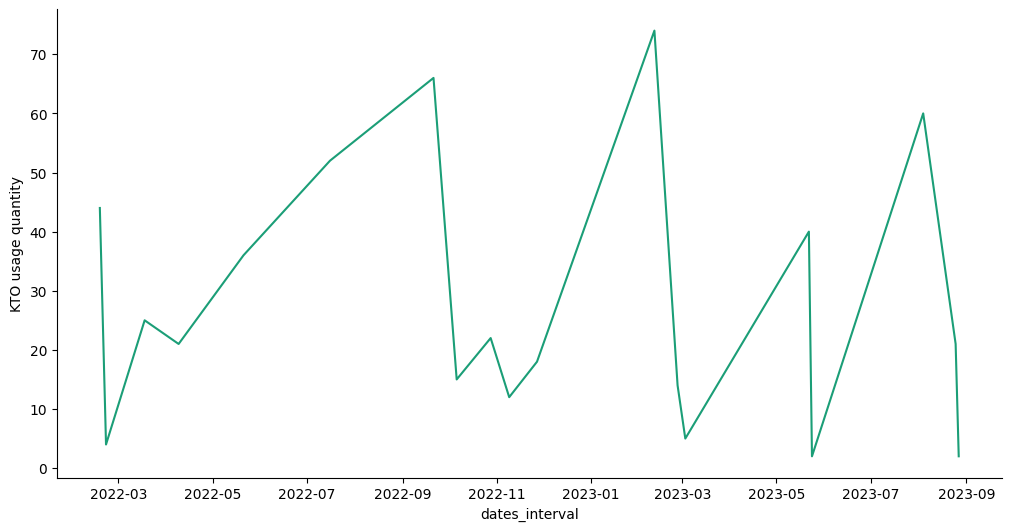

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['dates_interval']
  ys = series['days_in_supply']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = resupply.sort_values('dates_interval', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('dates_interval')
_ = plt.ylabel('KTO usage quantity')

## ACY_inserts

**What happens next:** A new DataFrame ACY_inserts_resupply will be created.

In [ ]:
ACY_inserts_resupply = resupply

**What happens next:** Calculate two type of ACY Inserts consumption with 2 rates

In [ ]:
ACY_inserts_resupply["assuption_burn_ACY_inserts"] = ACY_inserts_resupply["days_in_supply"] * ACY_inserts_resupply["crew_values"] * 1.300
ACY_inserts_resupply["calculated_burn_ACY_inserts"] = ACY_inserts_resupply["days_in_supply"] * ACY_inserts_resupply["crew_values"] * 1.54

**Result:**

ACY_inserts_resupply["assuption_burn_ACY_inserts"] stores the ACY Inserts consumption based on the assumed rate.
ACY_inserts_resupply["calculated_burn_ACY_inserts"] stores the CY Inserts consumption based on the calculated rate

In [ ]:
ACY_inserts_resupply

,dates_interval,days_in_supply,crew_values,assuption_burn_KTO,calculated_burn_KTO,assuption_burn_ACY_inserts,calculated_burn_ACY_inserts
0,2022-02-17,44,7,10.999912,13.860,400.4,474.32
1,2022-02-21,4,7,0.999992,1.260,36.4,43.12
2,2022-03-18,25,10,8.928500,11.250,325.0,385.00
3,2022-04-09,21,11,8.249934,10.395,300.3,355.74
4,2022-05-21,36,7,8.999928,11.340,327.6,388.08
5,2022-07-16,52,7,12.999896,16.380,473.2,560.56
6,2022-09-21,66,10,23.571240,29.700,858.0,1016.40
7,2022-10-06,15,11,5.892810,7.425,214.5,254.10
8,2022-10-28,22,7,5.499956,6.930,200.2,237.16
9,2022-11-09,12,7,2.999976,3.780,109.2,129.36


**Result:** a Dataframe comparing the amount of ACY Inserts consumed according to assumptions and calculations

## Pretreat Tank resupply.


**What happens next:** A new DataFrame Pretreat_Tank_resupply will be created.

In [ ]:
Pretreat_Tank_resupply = resupply

**What happens next:** Calculate two type of Pretreat Tanks consumption with 2 rates

In [ ]:
Pretreat_Tank_resupply["assumption_burn_Pretreat_tank"] = Pretreat_Tank_resupply["days_in_supply"] * Pretreat_Tank_resupply["crew_values"] * 0.005556
Pretreat_Tank_resupply["calculated_burn_Pretreat_tank"] = Pretreat_Tank_resupply["days_in_supply"] * Pretreat_Tank_resupply["crew_values"] * 0.00394862

**Result:**

Pretreat_Tank_resupply["assumption_burn_Pretreat_tank"] stores the Pretreat Tanks consumption based on the assumed rate.
Pretreat_Tank_resupply["calculated_burn_Pretreat_tank"] stores the Pretreat Tanks consumption based on the calculated rate

In [ ]:
Pretreat_Tank_resupply

,dates_interval,days_in_supply,crew_values,assuption_burn_KTO,calculated_burn_KTO,assuption_burn_ACY_inserts,calculated_burn_ACY_inserts,assumption_burn_Pretreat_tank,calculated_burn_Pretreat_tank
0,2022-02-17,44,7,10.999912,13.860,400.4,474.32,1.711248,1.216175
1,2022-02-21,4,7,0.999992,1.260,36.4,43.12,0.155568,0.110561
2,2022-03-18,25,10,8.928500,11.250,325.0,385.00,1.389000,0.987155
3,2022-04-09,21,11,8.249934,10.395,300.3,355.74,1.283436,0.912131
4,2022-05-21,36,7,8.999928,11.340,327.6,388.08,1.400112,0.995052
5,2022-07-16,52,7,12.999896,16.380,473.2,560.56,2.022384,1.437298
6,2022-09-21,66,10,23.571240,29.700,858.0,1016.40,3.666960,2.606089
7,2022-10-06,15,11,5.892810,7.425,214.5,254.10,0.916740,0.651522
8,2022-10-28,22,7,5.499956,6.930,200.2,237.16,0.855624,0.608087
9,2022-11-09,12,7,2.999976,3.780,109.2,129.36,0.466704,0.331684


**Result:** a Dataframe comparing the amount of Pretreat Tanks consumed according to assumptions and calculations

## EDV resupply

**What happens next:** A new DataFrame EDV_resupply will be created.

In [ ]:
EDV_resupply = resupply

**What happens next:** Calculate two type of EDV consumption with 2 rates

In [ ]:
EDV_resupply["assumption_burn_EDV"] = EDV_resupply["days_in_supply"] * EDV_resupply["crew_values"] * 0.007576
EDV_resupply["calculated_burn_EDV"] = EDV_resupply["days_in_supply"] * EDV_resupply["crew_values"] * 0.0027

**Result:**

EDV_resupply["assumption_burn_EDV"] stores the EDV consumption based on the assumed rate.

EDV_resupply["calculated_burn_EDV"] stores the EDV consumption based on the calculated rate

In [ ]:
EDV_resupply

,dates_interval,days_in_supply,crew_values,assuption_burn_KTO,calculated_burn_KTO,assuption_burn_ACY_inserts,calculated_burn_ACY_inserts,assumption_burn_Pretreat_tank,calculated_burn_Pretreat_tank,assumption_burn_EDV,calculated_burn_EDV
0,2022-02-17,44,7,10.999912,13.860,400.4,474.32,1.711248,1.216175,2.333408,0.8316
1,2022-02-21,4,7,0.999992,1.260,36.4,43.12,0.155568,0.110561,0.212128,0.0756
2,2022-03-18,25,10,8.928500,11.250,325.0,385.00,1.389000,0.987155,1.894000,0.6750
3,2022-04-09,21,11,8.249934,10.395,300.3,355.74,1.283436,0.912131,1.750056,0.6237
4,2022-05-21,36,7,8.999928,11.340,327.6,388.08,1.400112,0.995052,1.909152,0.6804
5,2022-07-16,52,7,12.999896,16.380,473.2,560.56,2.022384,1.437298,2.757664,0.9828
6,2022-09-21,66,10,23.571240,29.700,858.0,1016.40,3.666960,2.606089,5.000160,1.7820
7,2022-10-06,15,11,5.892810,7.425,214.5,254.10,0.916740,0.651522,1.250040,0.4455
8,2022-10-28,22,7,5.499956,6.930,200.2,237.16,0.855624,0.608087,1.166704,0.4158
9,2022-11-09,12,7,2.999976,3.780,109.2,129.36,0.466704,0.331684,0.636384,0.2268


Result: a Dataframe comparing the amount of EDV consumed according to assumptions and calculations

## Filter Inserts resupply

**What happens next:** A new DataFrame Filter_inserts_resupply will be created.

In [ ]:
Filter_inserts_resupply = resupply

**What happens next:** Calculate two type of Filter Inserts consumption with 2 rates

In [ ]:
Filter_inserts_resupply["assumption_burn_Filter_inserts"] = Filter_inserts_resupply["days_in_supply"] * Filter_inserts_resupply["crew_values"] * 0.007576
Filter_inserts_resupply["calculated_burn_Filter_inserts"] = Filter_inserts_resupply["days_in_supply"] * Filter_inserts_resupply["crew_values"] * 0.007959

**Result:**

Filter_inserts_resupply["assumption_burn_Filter_inserts"] stores the Filter Inserts consumption based on the assumed rate.

Filter_inserts_resupply["calculated_burn_Filter_inserts"] stores the Filter Inserts consumption based on the calculated rate

In [ ]:
Filter_inserts_resupply

,dates_interval,days_in_supply,crew_values,assuption_burn_KTO,calculated_burn_KTO,assuption_burn_ACY_inserts,calculated_burn_ACY_inserts,assumption_burn_Pretreat_tank,calculated_burn_Pretreat_tank,assumption_burn_EDV,calculated_burn_EDV,assumption_burn_Filter_inserts,calculated_burn_Filter_inserts
0,2022-02-17,44,7,10.999912,13.860,400.4,474.32,1.711248,1.216175,2.333408,0.8316,2.333408,2.451372
1,2022-02-21,4,7,0.999992,1.260,36.4,43.12,0.155568,0.110561,0.212128,0.0756,0.212128,0.222852
2,2022-03-18,25,10,8.928500,11.250,325.0,385.00,1.389000,0.987155,1.894000,0.6750,1.894000,1.989750
3,2022-04-09,21,11,8.249934,10.395,300.3,355.74,1.283436,0.912131,1.750056,0.6237,1.750056,1.838529
4,2022-05-21,36,7,8.999928,11.340,327.6,388.08,1.400112,0.995052,1.909152,0.6804,1.909152,2.005668
5,2022-07-16,52,7,12.999896,16.380,473.2,560.56,2.022384,1.437298,2.757664,0.9828,2.757664,2.897076
6,2022-09-21,66,10,23.571240,29.700,858.0,1016.40,3.666960,2.606089,5.000160,1.7820,5.000160,5.252940
7,2022-10-06,15,11,5.892810,7.425,214.5,254.10,0.916740,0.651522,1.250040,0.4455,1.250040,1.313235
8,2022-10-28,22,7,5.499956,6.930,200.2,237.16,0.855624,0.608087,1.166704,0.4158,1.166704,1.225686
9,2022-11-09,12,7,2.999976,3.780,109.2,129.36,0.466704,0.331684,0.636384,0.2268,0.636384,0.668556


Result: a Dataframe comparing the amount of Filter Inserts consumed according to assumptions and calculations

## US Food resupply

**What happens next:** A new DataFrame Pretreat_Tank_resupply will be created.

In [ ]:
# It only starts from 2022-10-19: we predicted how much needed even in past for whole dataset time frame.
US_Food_resupply = resupply

**What happens next:** Calculate two type of Pretreat Tanks consumption with 2 rates

In [ ]:
US_Food_resupply["assumption_burn_US_Food"] = US_Food_resupply["days_in_supply"] * US_Food_resupply["crew_values"] * 0.02700
US_Food_resupply["calculated_burn_US_Food"] = US_Food_resupply["days_in_supply"] * US_Food_resupply["crew_values"] * 0.1032

Result:

US_Food_resupply["assumption_burn_US_Food"] stores the US Food consumption based on the assumed rate.
US_Food_resupply["calculated_burn_US_Food"] stores the US Food consumption based on the calculated rate

In [ ]:
US_Food_resupply

,dates_interval,days_in_supply,crew_values,assuption_burn_KTO,calculated_burn_KTO,assuption_burn_ACY_inserts,calculated_burn_ACY_inserts,assumption_burn_Pretreat_tank,calculated_burn_Pretreat_tank,assumption_burn_EDV,calculated_burn_EDV,assumption_burn_Filter_inserts,calculated_burn_Filter_inserts,assumption_burn_US_Food,calculated_burn_US_Food
0,2022-02-17,44,7,10.999912,13.860,400.4,474.32,1.711248,1.216175,2.333408,0.8316,2.333408,2.451372,8.316,31.7856
1,2022-02-21,4,7,0.999992,1.260,36.4,43.12,0.155568,0.110561,0.212128,0.0756,0.212128,0.222852,0.756,2.8896
2,2022-03-18,25,10,8.928500,11.250,325.0,385.00,1.389000,0.987155,1.894000,0.6750,1.894000,1.989750,6.750,25.8000
3,2022-04-09,21,11,8.249934,10.395,300.3,355.74,1.283436,0.912131,1.750056,0.6237,1.750056,1.838529,6.237,23.8392
4,2022-05-21,36,7,8.999928,11.340,327.6,388.08,1.400112,0.995052,1.909152,0.6804,1.909152,2.005668,6.804,26.0064
5,2022-07-16,52,7,12.999896,16.380,473.2,560.56,2.022384,1.437298,2.757664,0.9828,2.757664,2.897076,9.828,37.5648
6,2022-09-21,66,10,23.571240,29.700,858.0,1016.40,3.666960,2.606089,5.000160,1.7820,5.000160,5.252940,17.820,68.1120
7,2022-10-06,15,11,5.892810,7.425,214.5,254.10,0.916740,0.651522,1.250040,0.4455,1.250040,1.313235,4.455,17.0280
8,2022-10-28,22,7,5.499956,6.930,200.2,237.16,0.855624,0.608087,1.166704,0.4158,1.166704,1.225686,4.158,15.8928
9,2022-11-09,12,7,2.999976,3.780,109.2,129.36,0.466704,0.331684,0.636384,0.2268,0.636384,0.668556,2.268,8.6688


**Result:** a Dataframe comparing the amount of US Food consumed according to assumptions and calculations

## RS Food resupply

**What happens next:** A new DataFrame Pretreat_Tank_resupply will be created.

In [ ]:
# It only starts from 2022-10-19: we predicted how much needed even in past for whole dataset time frame.
RS_Food_resupply = resupply

**What happens next:** Calculate two type of Pretreat Tanks consumption with 2 rates

In [ ]:
US_Food_resupply["assumption_burn_RS_Food"] = US_Food_resupply["days_in_supply"] * US_Food_resupply["crew_values"] * 0.2
US_Food_resupply["calculated_burn_RS_Food"] = US_Food_resupply["days_in_supply"] * US_Food_resupply["crew_values"] * 0.03
RS_Food_resupply

,dates_interval,days_in_supply,crew_values,assuption_burn_KTO,calculated_burn_KTO,assuption_burn_ACY_inserts,calculated_burn_ACY_inserts,assumption_burn_Pretreat_tank,calculated_burn_Pretreat_tank,assumption_burn_EDV,calculated_burn_EDV,assumption_burn_Filter_inserts,calculated_burn_Filter_inserts,assumption_burn_US_Food,calculated_burn_US_Food,assumption_burn_RS_Food,calculated_burn_RS_Food
0,2022-02-17,44,7,10.999912,13.860,400.4,474.32,1.711248,1.216175,2.333408,0.8316,2.333408,2.451372,8.316,31.7856,61.6,9.24
1,2022-02-21,4,7,0.999992,1.260,36.4,43.12,0.155568,0.110561,0.212128,0.0756,0.212128,0.222852,0.756,2.8896,5.6,0.84
2,2022-03-18,25,10,8.928500,11.250,325.0,385.00,1.389000,0.987155,1.894000,0.6750,1.894000,1.989750,6.750,25.8000,50.0,7.50
3,2022-04-09,21,11,8.249934,10.395,300.3,355.74,1.283436,0.912131,1.750056,0.6237,1.750056,1.838529,6.237,23.8392,46.2,6.93
4,2022-05-21,36,7,8.999928,11.340,327.6,388.08,1.400112,0.995052,1.909152,0.6804,1.909152,2.005668,6.804,26.0064,50.4,7.56
5,2022-07-16,52,7,12.999896,16.380,473.2,560.56,2.022384,1.437298,2.757664,0.9828,2.757664,2.897076,9.828,37.5648,72.8,10.92
6,2022-09-21,66,10,23.571240,29.700,858.0,1016.40,3.666960,2.606089,5.000160,1.7820,5.000160,5.252940,17.820,68.1120,132.0,19.80
7,2022-10-06,15,11,5.892810,7.425,214.5,254.10,0.916740,0.651522,1.250040,0.4455,1.250040,1.313235,4.455,17.0280,33.0,4.95
8,2022-10-28,22,7,5.499956,6.930,200.2,237.16,0.855624,0.608087,1.166704,0.4158,1.166704,1.225686,4.158,15.8928,30.8,4.62
9,2022-11-09,12,7,2.999976,3.780,109.2,129.36,0.466704,0.331684,0.636384,0.2268,0.636384,0.668556,2.268,8.6688,16.8,2.52


Result:

RS_Food_resupply["assumption_burn_RS_Food"] stores the US Food consumption based on the assumed rate.
RS_Food_resupply["calculated_burn_RS_Food"] stores the US Food consumption based on the calculated rate

**Result:** a Dataframe comparing the amount of RS Food consumed according to assumptions and calculations

# Visiual Analysis

done by) Suraj Thapa

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
resuply_data = RS_Food_resupply

## day interval of flights

**What happens next:** Draw a plot which visualizes the number of days between flights over time.

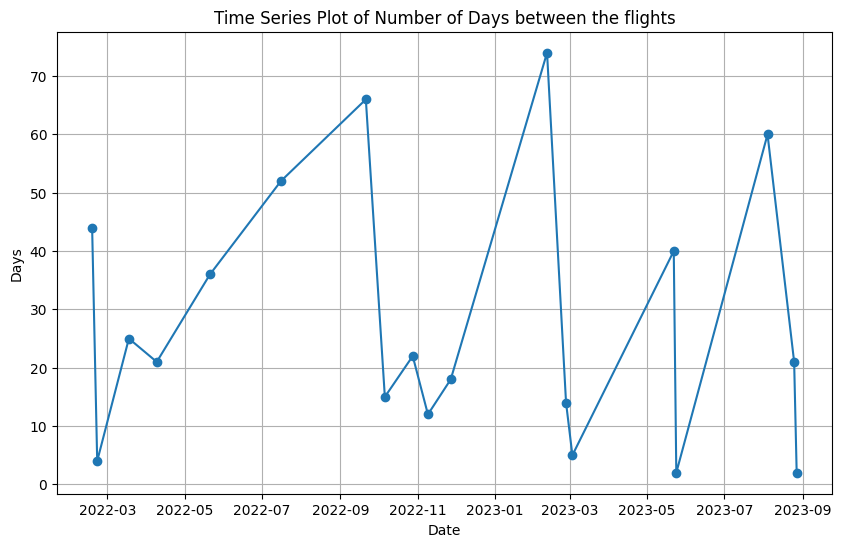

In [ ]:
# day interval of flights

# Plotting the time series
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.plot(resuply_data['dates_interval'], resuply_data['days_in_supply'], marker='o', linestyle='-')

# Customize the plot
plt.title('Time Series Plot of Number of Days between the flights')
plt.xlabel('Date')
plt.ylabel('Days')
plt.grid(True)  # Optional: Add gridlines

# Show plot
plt.show()

**Explanation:**

## crew number visual in between the flights.

**What happens next:** Draw a plot which shows a time series of crew counts between flights over specific dates.

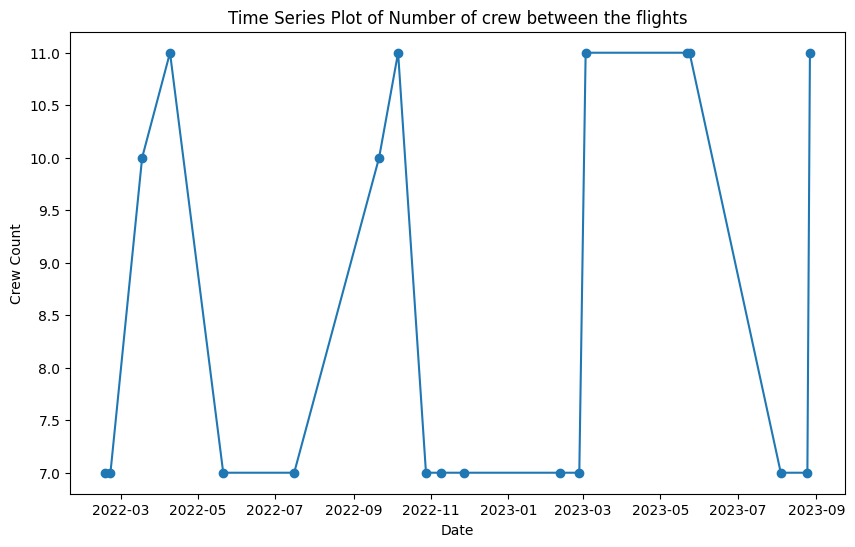

In [ ]:
# crew number visual in each interval.
# Plotting the time series
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.plot(resuply_data['dates_interval'], resuply_data['crew_values'], marker='o', linestyle='-')

# Customize the plot
plt.title('Time Series Plot of Number of crew between the flights')
plt.xlabel('Date')
plt.ylabel('Crew Count')
# plt.grid(True)  # Optional: Add gridlines

# Show plot
plt.show()

**Explanation:**

## usage amount for each interval in each categories.


**What happens next:** Draw a plot which shows calculated consumption trends by different categories (KTO, ACY Inserts, Pretreat Tanks, Filter Inserts, EDV, US Food, RS Food) over time.

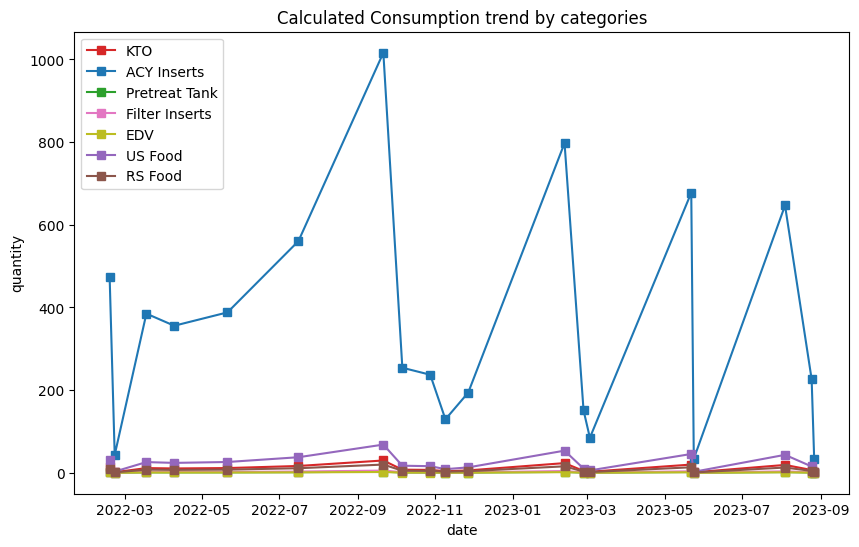

In [ ]:
# usage amount for each interval in each categories.

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first y-axis data (left y-axis)
ax1.plot(resuply_data['dates_interval'], resuply_data['calculated_burn_KTO'], color='tab:red', marker='s', label='KTO')
ax1.plot(resuply_data['dates_interval'], resuply_data['calculated_burn_ACY_inserts'], color='tab:blue', marker='s', label='ACY Inserts')
ax1.plot(resuply_data['dates_interval'], resuply_data['calculated_burn_Pretreat_tank'], color='tab:green', marker='s', label='Pretreat Tank')
ax1.plot(resuply_data['dates_interval'], resuply_data['calculated_burn_Filter_inserts'], color='tab:pink', marker='s', label='Filter Inserts')
ax1.plot(resuply_data['dates_interval'], resuply_data['calculated_burn_EDV'], color='tab:olive', marker='s', label='EDV')
ax1.plot(resuply_data['dates_interval'], resuply_data['calculated_burn_US_Food'], color='tab:purple', marker='s', label='US Food')
ax1.plot(resuply_data['dates_interval'], resuply_data['calculated_burn_RS_Food'], color='tab:brown', marker='s', label='RS Food')
ax1.set_xlabel('date')
ax1.set_ylabel('quantity', color='black')


# Display legends for each set of data
ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# Show plot
plt.title('Calculated Consumption trend by categories')
plt.show()

**Explanation:** The plot "Calculated Consumption trend by categories" displays the consumption trends of various categories over time. Most categories, such as KTO, Pretreat Tank, Filter Inserts, EDV, US Food, and RS Food, show relatively stable and low levels of consumption over the same periods. In contrast, ACY Inserts displays significant spikes, suggesting either episodic usage that aligns with specific operational needs or potential inventory management issues that need addressing.

## calculated vs assumed quantity for Filter inserts.

**What happens next:** Draw a plot to compare the calculated consumption vs assumed consumption for Filter Inserts

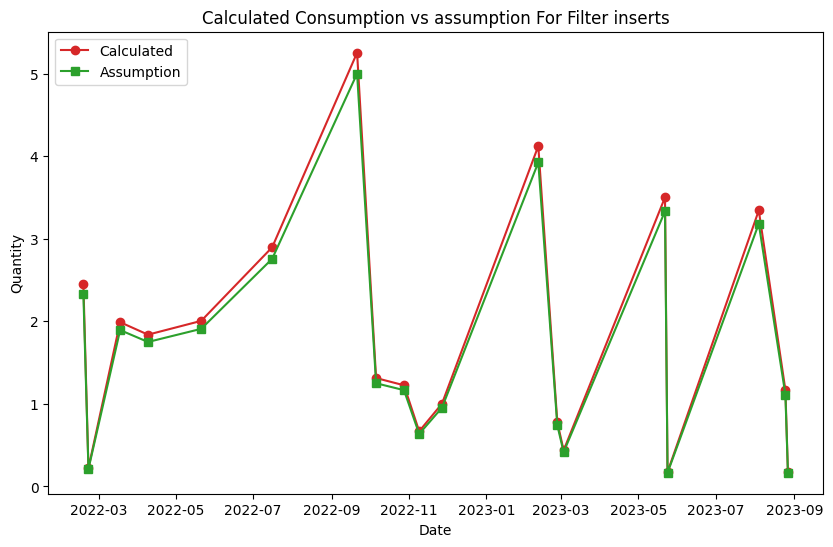

In [ ]:

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first y-axis data (left y-axis)
ax1.plot(resuply_data['dates_interval'], resuply_data['calculated_burn_Filter_inserts'], color='tab:red', marker='o', label='Calculated')

ax1.plot(resuply_data['dates_interval'], resuply_data['assumption_burn_Filter_inserts'], color='tab:green', marker='s', label='Assumption')


ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity', color='black')


# Display legends for each set of data
ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# Show plot
plt.title('Calculated Consumption vs assumption For Filter inserts')
plt.show()

**Explanation:**

## Calculated vs assumption usage rate for each categories.(bar plot)

**What happens next:** Draw a bar chart to compare calculated rates and assumed rates for different categories

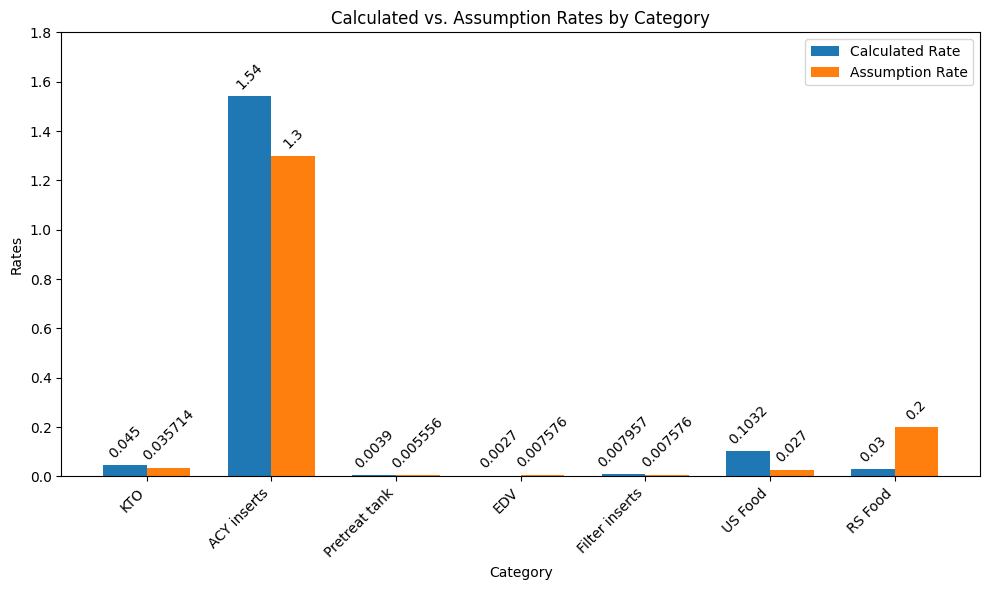

In [ ]:
import numpy as np

# Calculated vs assumption usage rate for each categories.(bar plot)
category = ["KTO", 'ACY inserts', 'Pretreat tank', 'EDV' ,'Filter inserts', 'US Food', 'RS Food']
calculated_rate = [0.045, 1.54, 0.0039, 0.0027, 0.007957, 0.1032, 0.03 ]
assumption_rate = [0.035714, 1.3, 0.005556, 0.007576, 0.007576, 0.02700, 0.2000]

data_bar = pd.DataFrame({
    'category': category,
    'calculated_rate': calculated_rate,
    'assumption_rate': assumption_rate
})

# Plotting
x = np.arange(len(data_bar))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for 'calculated_rate'
rects1 = ax.bar(x - width/2, data_bar['calculated_rate'], width, label='Calculated Rate')

# Plot bars for 'assumption_rate'
rects2 = ax.bar(x + width/2, data_bar['assumption_rate'], width, label='Assumption Rate')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Category')
ax.set_ylabel('Rates')

ax.set_ylim(0, 1.8)

ax.set_title('Calculated vs. Assumption Rates by Category')
ax.set_xticks(x)
ax.set_xticklabels(data_bar['category'], rotation=45, ha="right")
ax.legend()

# Function to label bars with values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation = 45)


# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)

# Show plot
plt.tight_layout()
plt.show()

**Result:**
The bar chart "Calculated vs. Assumption Rates by Category" compares the consumption rates calculated based on actual data against the rates that were initially assumed for various categories. There is a large difference between the calculated rate and the assumption rate for US Food and RS Food

**Assumed vs. Calculated Burn Rate KTO**

**What happens next:** Draw a bar chart to compare the assumed and calculated burn rates for KTO over various months in 2022 and 2023.

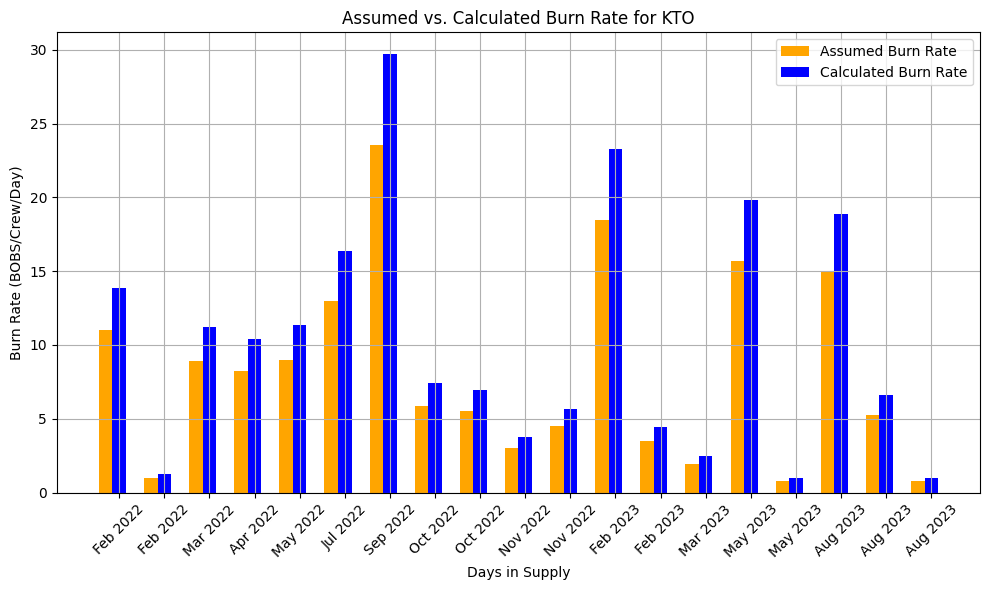

In [ ]:
# KTO
# 1

KTO_resupply['formatted_dates'] = KTO_resupply['dates_interval'].dt.strftime('%b %Y')
fig, ax = plt.subplots(figsize=(10,6))

#
x = np.arange(len(KTO_resupply['dates_interval']))

# bar width
width = 0.3

# plt
rects1 = ax.bar(x - width, KTO_resupply['assuption_burn_KTO'], width, label='Assumed Burn Rate', color='orange')
rects2 = ax.bar(x, KTO_resupply['calculated_burn_KTO'], width, label='Calculated Burn Rate', color='b')


#
ax.set_xlabel('Days in Supply')
ax.set_ylabel('Burn Rate (BOBS/Crew/Day)')
ax.set_title('Assumed vs. Calculated Burn Rate for KTO')
ax.set_xticks(x)
ax.set_xticklabels(KTO_resupply['formatted_dates'])
ax.legend()

# grid
ax.grid(True)

# rotate dates
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Explanation:**

**Assumed vs. Calculated Burn Rate ACY**

**What happens next:** Draw a bar chart to compare the assumed and calculated burn rates for ACY Inserts over various months in 2022 and 2023.

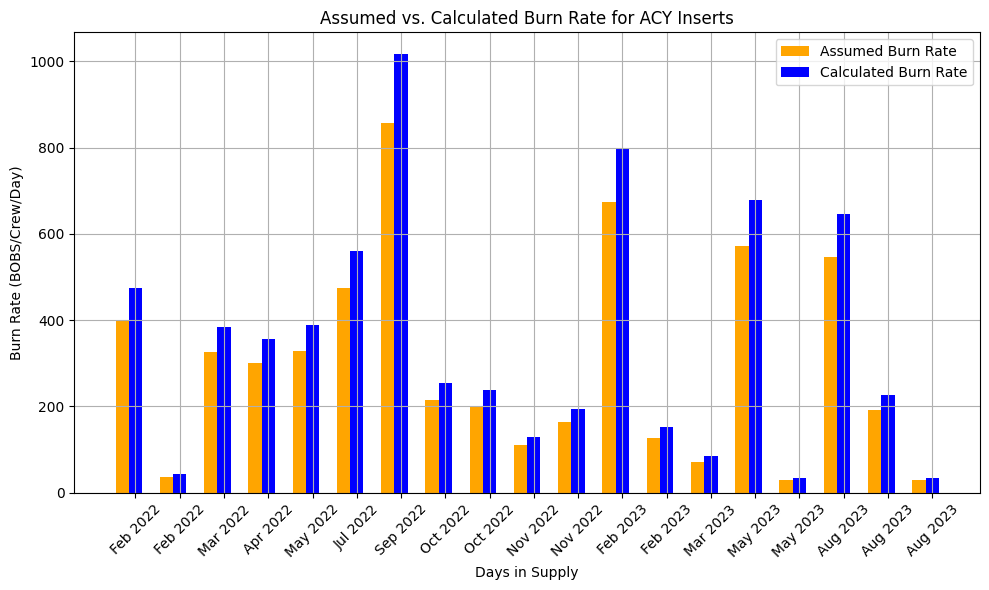

In [ ]:
# ACY Inserts
# 2

ACY_inserts_resupply['formatted_dates'] = ACY_inserts_resupply['dates_interval'].dt.strftime('%b %Y')
fig, ax = plt.subplots(figsize=(10,6))

#
x = np.arange(len(ACY_inserts_resupply['dates_interval']))

# bar width
width = 0.3

# plt
rects1 = ax.bar(x - width, ACY_inserts_resupply["assuption_burn_ACY_inserts"], width, label='Assumed Burn Rate', color='orange')
rects2 = ax.bar(x, ACY_inserts_resupply["calculated_burn_ACY_inserts"], width, label='Calculated Burn Rate', color='b')

#
ax.set_xlabel('Days in Supply')
ax.set_ylabel('Burn Rate (BOBS/Crew/Day)')
ax.set_title('Assumed vs. Calculated Burn Rate for ACY Inserts')
ax.set_xticks(x)
ax.set_xticklabels(US_Food_resupply['formatted_dates'])
ax.legend()

# grid
ax.grid(True)

# rotate dates
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Explanation:**

**Assumed vs. Calculated Burn Rate Pretreat Tank**

**What happens next:** Draw a bar chart to compare the assumed and calculated burn rates for Pretreat Tanks over various months in 2022 and 2023.

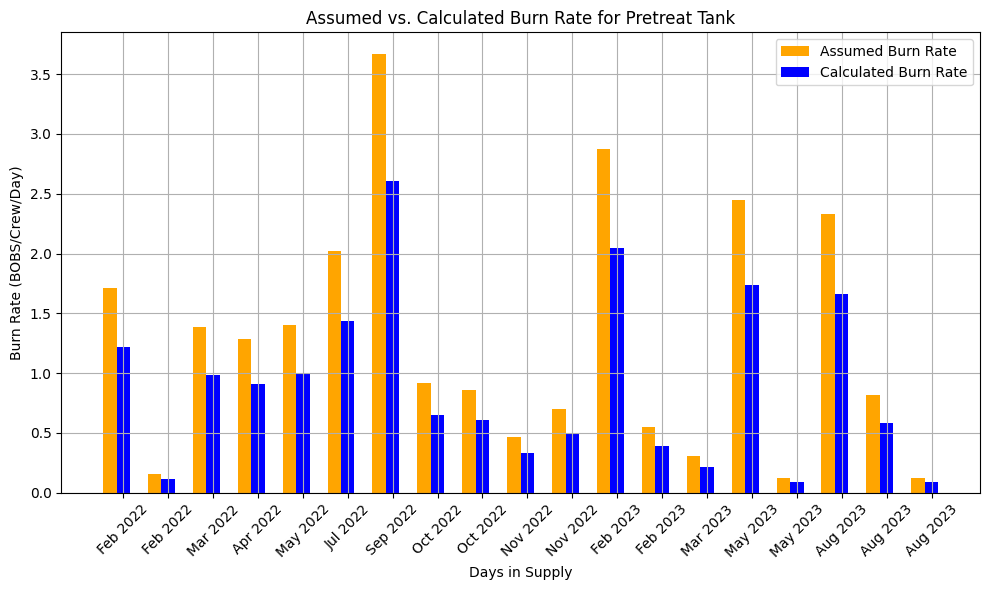

In [ ]:
# Pretreat Tank
# 3

Pretreat_Tank_resupply['formatted_dates'] = Pretreat_Tank_resupply['dates_interval'].dt.strftime('%b %Y')
fig, ax = plt.subplots(figsize=(10,6))

#
x = np.arange(len(Pretreat_Tank_resupply['dates_interval']))

# bar width
width = 0.3

# plt
rects1 = ax.bar(x - width, Pretreat_Tank_resupply['assumption_burn_Pretreat_tank'], width, label='Assumed Burn Rate', color='orange')
rects2 = ax.bar(x, Pretreat_Tank_resupply['calculated_burn_Pretreat_tank'], width, label='Calculated Burn Rate', color='b')

#
ax.set_xlabel('Days in Supply')
ax.set_ylabel('Burn Rate (BOBS/Crew/Day)')
ax.set_title('Assumed vs. Calculated Burn Rate for Pretreat Tank')
ax.set_xticks(x)
ax.set_xticklabels(Pretreat_Tank_resupply['formatted_dates'])
ax.legend()

# grid
ax.grid(True)

# rotate dates
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Explanation:**

**Assumed vs. Calculated Burn Rate EDV**

**What happens next:** Draw a bar chart to compare the assumed and calculated burn rates for EDV over various months in 2022 and 2023.

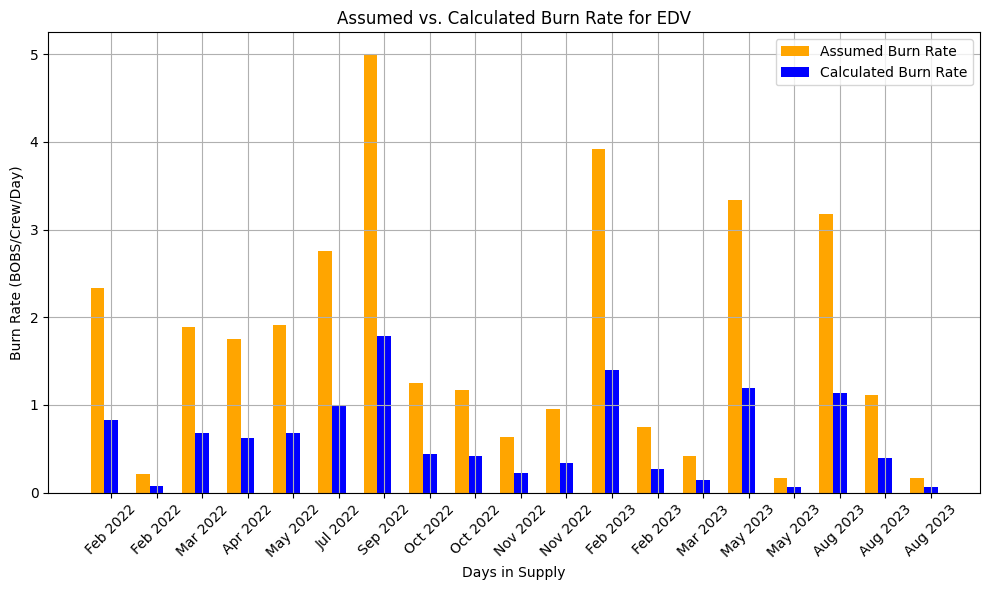

In [ ]:
# EDV
# 4

EDV_resupply['formatted_dates'] = EDV_resupply['dates_interval'].dt.strftime('%b %Y')
fig, ax = plt.subplots(figsize=(10,6))

#
x = np.arange(len(EDV_resupply['dates_interval']))

# bar width
width = 0.3

# plt
rects1 = ax.bar(x - width, EDV_resupply['assumption_burn_EDV'], width, label='Assumed Burn Rate', color='orange')
rects2 = ax.bar(x, EDV_resupply['calculated_burn_EDV'], width, label='Calculated Burn Rate', color='b')

#
ax.set_xlabel('Days in Supply')
ax.set_ylabel('Burn Rate (BOBS/Crew/Day)')
ax.set_title('Assumed vs. Calculated Burn Rate for EDV')
ax.set_xticks(x)
ax.set_xticklabels(EDV_resupply['formatted_dates'])
ax.legend()

# grid
ax.grid(True)

# rotate dates
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Explanation:**

**Assumed vs. Calculated Burn Rate Filter Inserts**

**What happens next:** Draw a bar chart to compare the assumed and calculated burn rates for Filter Inserts over various months in 2022 and 2023.

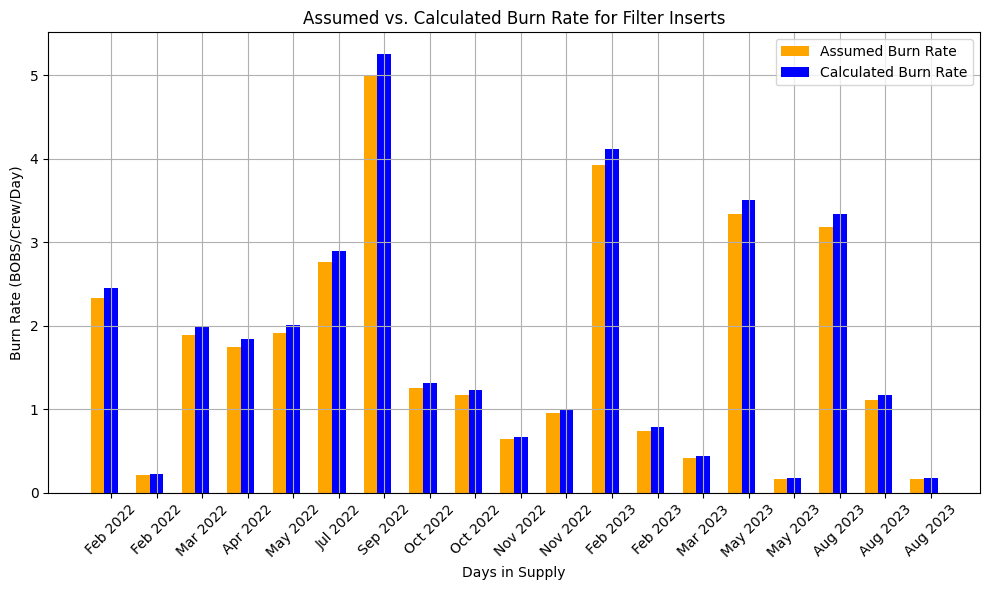

In [ ]:
# Filter Inserts
# 5

Filter_inserts_resupply['formatted_dates'] = Filter_inserts_resupply['dates_interval'].dt.strftime('%b %Y')
fig, ax = plt.subplots(figsize=(10,6))

#
x = np.arange(len(Filter_inserts_resupply['dates_interval']))

# bar width
width = 0.3

# plt
rects1 = ax.bar(x - width, Filter_inserts_resupply['assumption_burn_Filter_inserts'], width, label='Assumed Burn Rate', color='orange')
rects2 = ax.bar(x, Filter_inserts_resupply['calculated_burn_Filter_inserts'], width, label='Calculated Burn Rate', color='b')

#
ax.set_xlabel('Days in Supply')
ax.set_ylabel('Burn Rate (BOBS/Crew/Day)')
ax.set_title('Assumed vs. Calculated Burn Rate for Filter Inserts')
ax.set_xticks(x)
ax.set_xticklabels(Filter_inserts_resupply['formatted_dates'])
ax.legend()

# grid
ax.grid(True)

# rotate dates
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Explanation:**

**Assumed vs. Calculated Burn Rate US Food**

**What happens next:** Draw a bar chart to compare the assumed and calculated burn rates for US Food over various months in 2022 and 2023.

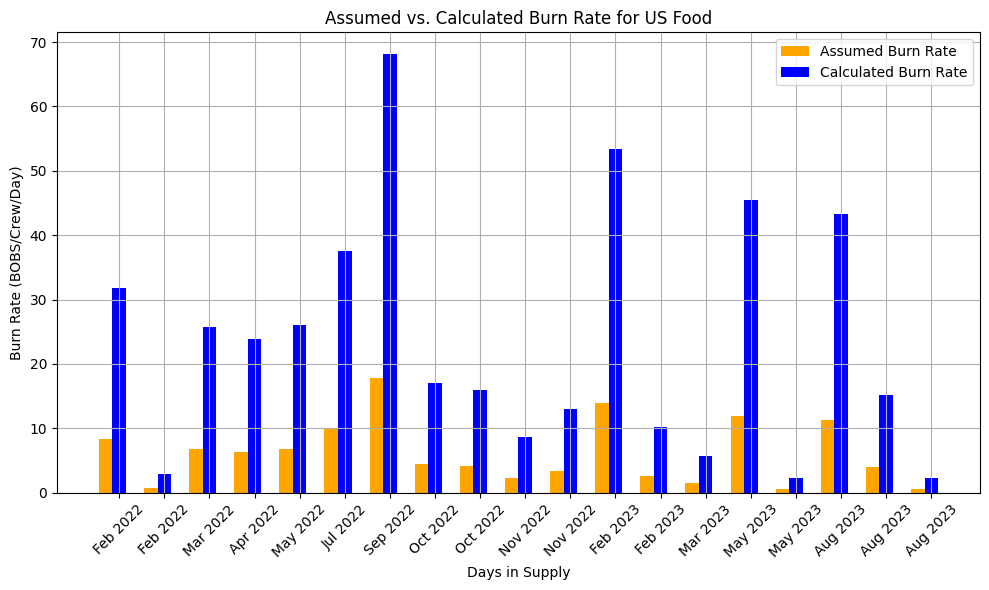

In [ ]:
# US Food
# 6

US_Food_resupply['formatted_dates'] = US_Food_resupply['dates_interval'].dt.strftime('%b %Y')
fig, ax = plt.subplots(figsize=(10,6))

#
x = np.arange(len(US_Food_resupply['dates_interval']))

# bar width
width = 0.3

# plt
rects1 = ax.bar(x - width, US_Food_resupply['assumption_burn_US_Food'], width, label='Assumed Burn Rate', color='orange')
rects2 = ax.bar(x, US_Food_resupply['calculated_burn_US_Food'], width, label='Calculated Burn Rate', color='b')

#
ax.set_xlabel('Days in Supply')
ax.set_ylabel('Burn Rate (BOBS/Crew/Day)')
ax.set_title('Assumed vs. Calculated Burn Rate for US Food')
ax.set_xticks(x)
ax.set_xticklabels(US_Food_resupply['formatted_dates'])
ax.legend()

# grid
ax.grid(True)

# rotate dates
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Explanation:**

**Assumed vs. Calculated Burn Rate RS Food**

**What happens next:** Draw a bar chart to compare the assumed and calculated burn rates for RS Food over various months in 2022 and 2023.

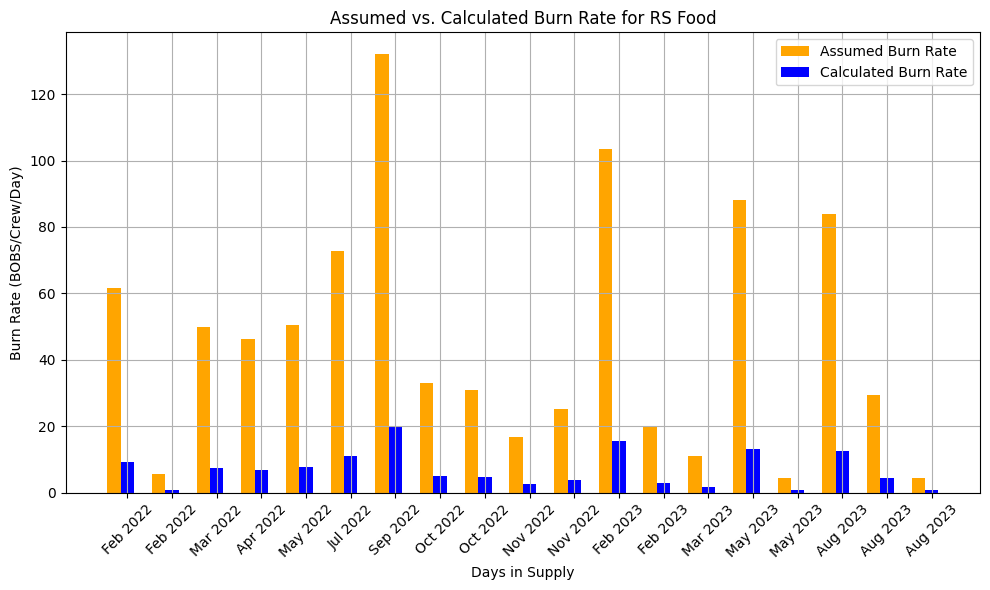

In [ ]:
# RS Food
# 7

RS_Food_resupply['formatted_dates'] = RS_Food_resupply['dates_interval'].dt.strftime('%b %Y')
fig, ax = plt.subplots(figsize=(10,6))

#
x = np.arange(len(RS_Food_resupply['dates_interval']))

# bar width
width = 0.3

# plt
rects1 = ax.bar(x - width, RS_Food_resupply['assumption_burn_RS_Food'], width, label='Assumed Burn Rate', color='orange')
rects2 = ax.bar(x, RS_Food_resupply['calculated_burn_RS_Food'], width, label='Calculated Burn Rate', color='b')

#
ax.set_xlabel('Days in Supply')
ax.set_ylabel('Burn Rate (BOBS/Crew/Day)')
ax.set_title('Assumed vs. Calculated Burn Rate for RS Food')
ax.set_xticks(x)
ax.set_xticklabels(RS_Food_resupply['formatted_dates'])
ax.legend()

# grid
ax.grid(True)

# rotate dates
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

**Explanation:**

# Forcasting prediction

In [ ]:
data = resuply_data[resuply_data['dates_interval']<'2023-08-25'] # let's do forcasting for 21 days for each calculated categories.
data

,dates_interval,days_in_supply,crew_values,assuption_burn_KTO,calculated_burn_KTO,assuption_burn_ACY_inserts,calculated_burn_ACY_inserts,assumption_burn_Pretreat_tank,calculated_burn_Pretreat_tank,assumption_burn_EDV,calculated_burn_EDV,assumption_burn_Filter_inserts,calculated_burn_Filter_inserts,assumption_burn_US_Food,calculated_burn_US_Food,assumption_burn_RS_Food,calculated_burn_RS_Food,formatted_dates
0,2022-02-17,44,7,10.999912,13.860,400.4,474.32,1.711248,1.216175,2.333408,0.8316,2.333408,2.451372,8.316,31.7856,61.6,9.24,Feb 2022
1,2022-02-21,4,7,0.999992,1.260,36.4,43.12,0.155568,0.110561,0.212128,0.0756,0.212128,0.222852,0.756,2.8896,5.6,0.84,Feb 2022
2,2022-03-18,25,10,8.928500,11.250,325.0,385.00,1.389000,0.987155,1.894000,0.6750,1.894000,1.989750,6.750,25.8000,50.0,7.50,Mar 2022
3,2022-04-09,21,11,8.249934,10.395,300.3,355.74,1.283436,0.912131,1.750056,0.6237,1.750056,1.838529,6.237,23.8392,46.2,6.93,Apr 2022
4,2022-05-21,36,7,8.999928,11.340,327.6,388.08,1.400112,0.995052,1.909152,0.6804,1.909152,2.005668,6.804,26.0064,50.4,7.56,May 2022
5,2022-07-16,52,7,12.999896,16.380,473.2,560.56,2.022384,1.437298,2.757664,0.9828,2.757664,2.897076,9.828,37.5648,72.8,10.92,Jul 2022
6,2022-09-21,66,10,23.571240,29.700,858.0,1016.40,3.666960,2.606089,5.000160,1.7820,5.000160,5.252940,17.820,68.1120,132.0,19.80,Sep 2022
7,2022-10-06,15,11,5.892810,7.425,214.5,254.10,0.916740,0.651522,1.250040,0.4455,1.250040,1.313235,4.455,17.0280,33.0,4.95,Oct 2022
8,2022-10-28,22,7,5.499956,6.930,200.2,237.16,0.855624,0.608087,1.166704,0.4158,1.166704,1.225686,4.158,15.8928,30.8,4.62,Oct 2022
9,2022-11-09,12,7,2.999976,3.780,109.2,129.36,0.466704,0.331684,0.636384,0.2268,0.636384,0.668556,2.268,8.6688,16.8,2.52,Nov 2022


## Predicting for existing interval.

**Forcasting with ARIMA is highly uncertain, especially as the length of the forecast horizon increases relative to the data length.**


<ipython-input-144-d1f9081908ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dates_interval'] = pd.to_datetime(data['dates_interval'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has 

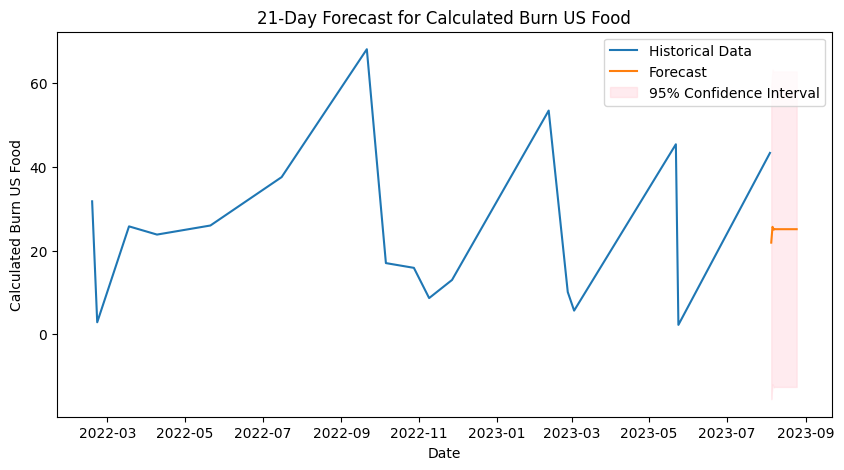

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming your data is already in a DataFrame called `data`
data['dates_interval'] = pd.to_datetime(data['dates_interval'])
data.set_index('dates_interval', inplace=True)

# Focusing on the 'calculated_burn_US_Food' column
ts_food = data['calculated_burn_US_Food']

# Fit an ARIMA model; assuming parameters (p=1, d=1, q=1) as an example
model_food = ARIMA(ts_food, order=(1,1,1))
model_fit_food = model_food.fit()

# Forecast the next 21 days
forecast_food = model_fit_food.get_forecast(steps=21)
forecast_index_food = pd.date_range(ts_food.index[-1], periods=22, freq='D')[1:]  # start from the day after the last date in ts_food

# Confidence intervals
conf_int_food = forecast_food.conf_int()

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(ts_food.index, ts_food, label='Historical Data')
plt.plot(forecast_index_food, forecast_food.predicted_mean, label='Forecast')
plt.fill_between(forecast_index_food, conf_int_food.iloc[:, 0], conf_int_food.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.legend()
plt.title('21-Day Forecast for Calculated Burn US Food')
plt.xlabel('Date')
plt.ylabel('Calculated Burn US Food')
plt.show()

**Tried to perform diagnostic checks to see what ARIMA model would be best for this data to sucessfully showcase the forcasting. Unfortunatelly, this was done in vain. Nothing we tried was successful to graph the forcasting**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


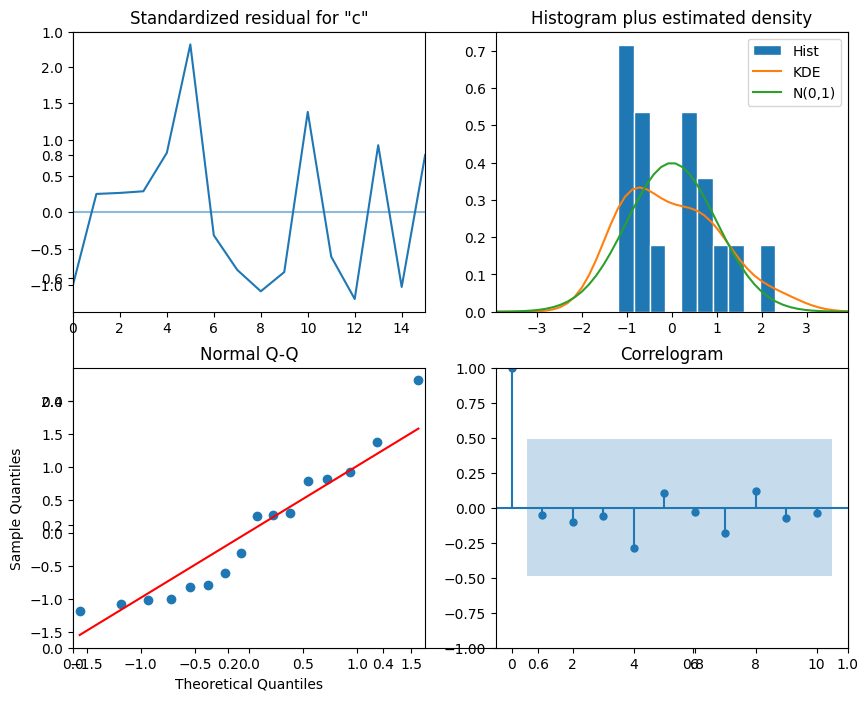

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


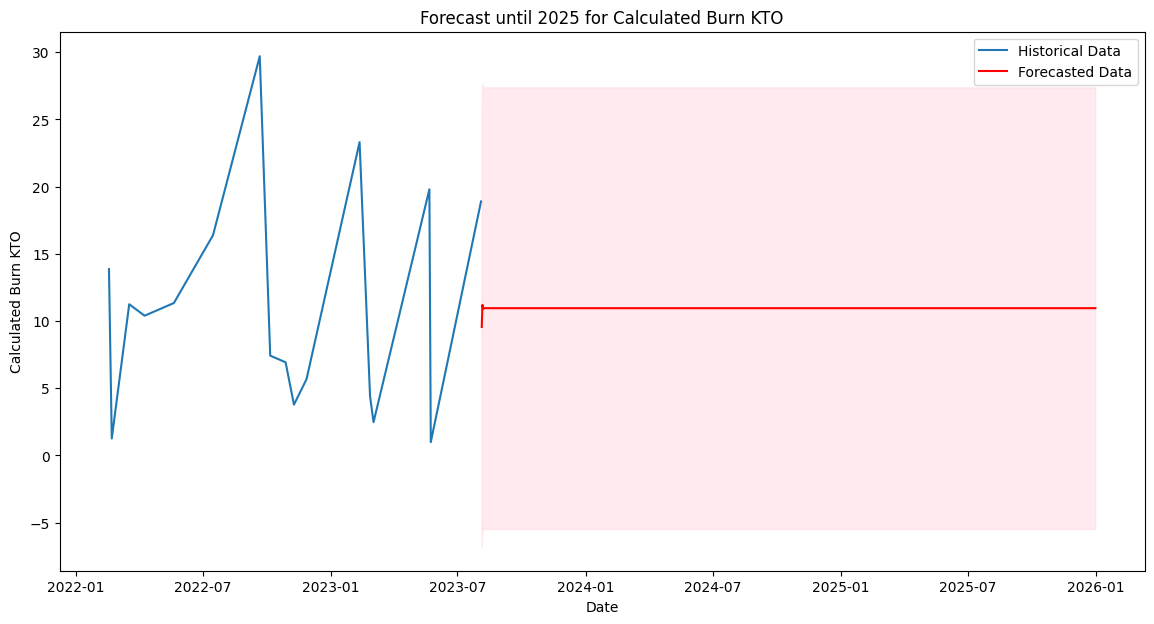

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Select the target variable
target = data['calculated_burn_KTO']

# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Fit the ARIMA model (you might need to fine-tune p, d, q values)
model = ARIMA(target, order=(1, 1, 1))  # Example parameters
model_fit = model.fit()
fig, ax = plt.subplots(figsize=(10, 8))
model_fit.plot_diagnostics(fig=fig)
plt.show()

# Determine the number of days until the end of 2025
last_date = target.index[-1]
end_date = pd.Timestamp('2025-12-31')
days_to_forecast = (end_date - last_date).days

# Forecast until the end of 2025
forecast = model_fit.get_forecast(steps=days_to_forecast)
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), end=end_date, freq='D')

# Confidence intervals
conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(target.index, target, label='Historical Data')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Data', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast until 2025 for Calculated Burn KTO')
plt.xlabel('Date')
plt.ylabel('Calculated Burn KTO')
plt.legend()
plt.show()


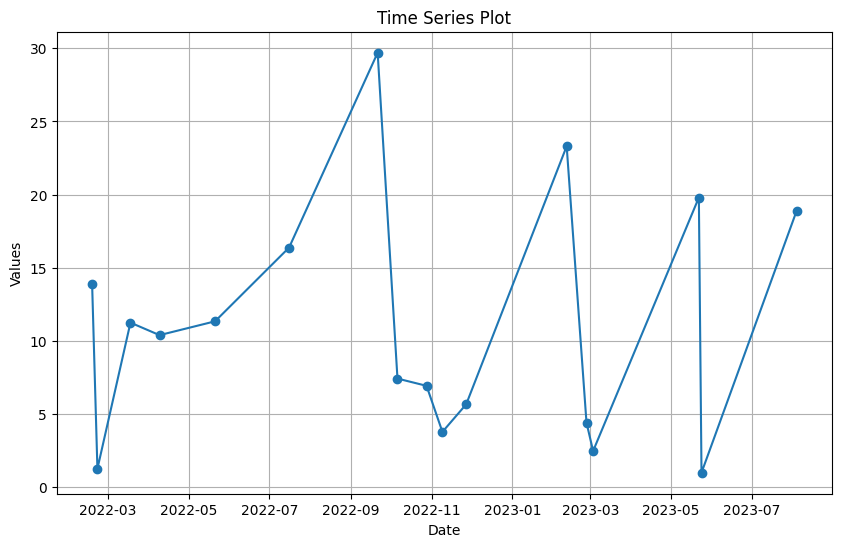

In [ ]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data['calculated_burn_KTO'], marker='o')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [ ]:
# calculating the means square error

import numpy as np

def mserror(actual, predicted):
  # Actual quantity
  # Calculate mean squared error (MSE)
  mse = np.square(actual - predicted).mean()

  print("Mean Squared Error (MSE):", mse)
mserror(4.41, 7)

Mean Squared Error (MSE): 6.708099999999999


**Conclusion:**

This dataset contains intricate details, and this project serves as an initial step toward unraveling meaningful insights about the supply process. The analysis of this dataset is part of a broader effort to delve deeper into supply chain dynamics and extract valuable information that can inform strategic decisions and optimizations.

**Future Work:**

Because of the limited timeframe and for simplicity we discarded other events that might be impactful to the results and also creating a threshold flag in the dataset can be done in the future.